# Amazon Sales Diwali Project - Aicha Dieng


## 1.Business Case Selection

For this project, I used the Amazon Diwali India Sales Dataset (2025) from Kaggle, which includes 15,000 transactions and 14 columns capturing customer behavior, product details, and total sales in INR. The dataset is synthetic but built to reflect real-world Amazon India sales during the Diwali season. I chose it because I’m really interested in sales prediction and how data can help businesses understand what drives their revenue.

Companies like Amazon would use a model like this to forecast sales, plan marketing campaigns, and manage inventory based on trends in product categories, prices, and ratings. The main goal is to predict total sales (INR) and identify which factors most influence customer spending during major shopping periods. This prediction supports better decision-making in pricing, promotions, and inventory planning.

Kaggle link : https://www.kaggle.com/datasets/anandshaw2001/amazon-product-sales-2025

## 2.Target Variable

For this project, I chose Total_Sales_INR as my target variable because it shows the exact amount of revenue generated from each purchase. Sales are the most direct indicator of performance in any e-commerce business, which is why I wanted to understand and predict the total sales during the Diwali season. I wanted to see what factors actually drive total sales, whether it’s price, quantity, or even customer feedback.

Since this variable is numerical and measurable, it’s perfect for building predictive models that can be evaluated and improved. In a real business context, predicting total sales helps companies like Amazon plan better, make smarter marketing and pricing decisions, and forecast revenue more accurately.

## 3.Exploratory Data Analysis (EDA)

In [836]:
from google.colab import files
uploaded = files.upload()

Saving amazon_sales_2025_INR.csv to amazon_sales_2025_INR (8).csv


In [837]:
import pandas as pd

amazon_df = pd.read_csv('amazon_sales_2025_INR.csv')
display(amazon_df.head())

Order_ID      Date    Customer_ID Product_Category  Product_Name  Quantity  Unit_Price_INR  Total_Sales_INR   Payment_Method  Delivery_Status  Review_Rating     Review_Text       State    Country
0  ORD100000  2025-01-25   CUST2796   Home & Kitchen   Cookware Set      2      25,574.4100      51,148.8200         Credit Card      Returned          1            Waste of money     Sikkim   India
1  ORD100001  2025-08-28   CUST9669           Beauty     Hair Dryer      1      19,361.4100      19,361.4100          Debit Card      Returned          5        Excellent product!  Telangana   India
2  ORD100002  2025-02-27   CUST5808      Electronics         Tablet      3      38,476.2200     115,428.6600    Cash on Delivery     Delivered          3                 Fair deal   Nagaland   India
3  ORD100003  2025-02-24   CUST5889      Electronics     Headphones      5      38,145.7200     190,728.6000         Credit Card     Delivered          5         Highly recommend!      Assam   India
4  ORD100004  2025-06-15   CUST9005         Clothing          Saree      5      45,940.9800     229,704.9000                 UPI     Delivered          5         Highly recommend!     Odisha   India

In [838]:
amazon_df.shape

(15000, 14)

The dataset includes 15,000 transactions recorded across 14 different features, such as product category, price, payment method, and delivery status, etc.
In other words, each row represents one customer order, and each column describes something about that order.

In [839]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Customer_ID       15000 non-null  object 
 3   Product_Category  15000 non-null  object 
 4   Product_Name      15000 non-null  object 
 5   Quantity          15000 non-null  int64  
 6   Unit_Price_INR    15000 non-null  float64
 7   Total_Sales_INR   15000 non-null  float64
 8   Payment_Method    15000 non-null  object 
 9   Delivery_Status   15000 non-null  object 
 10  Review_Rating     15000 non-null  int64  
 11  Review_Text       15000 non-null  object 
 12  State             15000 non-null  object 
 13  Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.6+ MB


In [840]:
amazon_df.isna().sum()

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Country             0
dtype: int64

- There are no missing values found in the dataset. Every column is complete and ready for analysis, which ensures that the results are accurate and not affected by missing or incomplete data.

In [841]:
amazon_df.dtypes

Order_ID             object
Date                 object
Customer_ID          object
Product_Category     object
Product_Name         object
Quantity              int64
Unit_Price_INR      float64
Total_Sales_INR     float64
Payment_Method       object
Delivery_Status      object
Review_Rating         int64
Review_Text          object
State                object
Country              object
dtype: object

In [842]:
amazon_df['Product_Category'].value_counts()

Product_Category
Electronics       3036
Books             3035
Clothing          3022
Beauty            2997
Home & Kitchen    2910
Name: count, dtype: int64

In [843]:
amazon_df['Payment_Method'].value_counts()

Payment_Method
Cash on Delivery    3827
Credit Card         3800
Debit Card          3727
UPI                 3646
Name: count, dtype: int64

In [844]:
amazon_df['Delivery_Status'].value_counts()

Delivery_Status
Delivered    5075
Pending      5044
Returned     4881
Name: count, dtype: int64

In [845]:
amazon_df['Review_Rating'].value_counts()

Review_Rating
5    3128
4    3022
3    3013
2    2998
1    2839
Name: count, dtype: int64

In [846]:
 amazon_df['Review_Text'].value_counts()

Review_Text
Satisfied with the product    658
Excellent product!            653
Fantastic quality!            641
Highly recommend!             637
Could be better               632
Poor packaging                626
Worth every rupee!            615
Good quality                  613
Average                       611
Pretty decent                 609
Quality could improve         607
Terrible experience           601
Not satisfied                 600
Not bad                       597
Would buy again               594
Okay product                  593
Product not as expected       592
Very bad product              586
Loved it!                     582
Fair deal                     580
Waste of money                573
Disappointed                  573
Value for money               548
Defective item                543
Never buying again            536
Name: count, dtype: int64

In [847]:
 amazon_df['Product_Name'].value_counts()

Product_Name
Children's Book     636
Perfume             629
Science Textbook    624
T-Shirt             623
Laptop              618
Tablet              616
Smartwatch          615
Air Fryer           614
Headphones          610
Jeans               604
Jacket              601
Hair Dryer          599
Fiction Novel       599
Saree               598
Comics              597
Sneakers            596
Face Cream          596
Lipstick            590
Shampoo             583
Mixer Grinder       582
Biography           579
Smartphone          577
Cookware Set        577
Water Purifier      570
Vacuum Cleaner      567
Name: count, dtype: int64

In [848]:
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])

# Convert other object columns to category
for col in amazon_df.select_dtypes(include='object').columns:
    amazon_df[col] = amazon_df[col].astype('category')

# Ensure Review_Text, Product_Category, etc. are also category (as some might have been object before)
amazon_df['Product_Category'] = amazon_df['Product_Category'].astype('category')
amazon_df['Product_Name'] = amazon_df['Product_Name'].astype('category')
amazon_df['Payment_Method'] = amazon_df['Payment_Method'].astype('category')
amazon_df['Delivery_Status'] = amazon_df['Delivery_Status'].astype('category')
amazon_df['Review_Text'] = amazon_df['Review_Text'].astype('category')
amazon_df['State'] = amazon_df['State'].astype('category')
amazon_df['Country'] = amazon_df['Country'].astype('category')

print("Data types after conversion:")
amazon_df.info()

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          15000 non-null  category      
 1   Date              15000 non-null  datetime64[ns]
 2   Customer_ID       15000 non-null  category      
 3   Product_Category  15000 non-null  category      
 4   Product_Name      15000 non-null  category      
 5   Quantity          15000 non-null  int64         
 6   Unit_Price_INR    15000 non-null  float64       
 7   Total_Sales_INR   15000 non-null  float64       
 8   Payment_Method    15000 non-null  category      
 9   Delivery_Status   15000 non-null  category      
 10  Review_Rating     15000 non-null  int64         
 11  Review_Text       15000 non-null  category      
 12  State             15000 non-null  category      
 13  Country           15000 non-null  category     

In [849]:
amazon_df = amazon_df.drop(columns=['Order_ID', 'Customer_ID'], errors='ignore')
print("Dropped 'Order_ID' and 'Customer_ID' columns.")
print(amazon_df.info())

Dropped 'Order_ID' and 'Customer_ID' columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              15000 non-null  datetime64[ns]
 1   Product_Category  15000 non-null  category      
 2   Product_Name      15000 non-null  category      
 3   Quantity          15000 non-null  int64         
 4   Unit_Price_INR    15000 non-null  float64       
 5   Total_Sales_INR   15000 non-null  float64       
 6   Payment_Method    15000 non-null  category      
 7   Delivery_Status   15000 non-null  category      
 8   Review_Rating     15000 non-null  int64         
 9   Review_Text       15000 non-null  category      
 10  State             15000 non-null  category      
 11  Country           15000 non-null  category      
dtypes: category(7), datetime64[ns](1), float64(2), int64(2)
memory usage: 692.0 KB
None


I checked the data types and changed them to the right format. The **Date** column was converted to **datetime**, and columns like **Product** **Category**, **Payment Method**, **Delivery Status**, **Review Rating**, and **Review Text **were changed to **categorical**. I also *dropped* the ID columns like **Order_ID** and **Customer_ID** since they don’t help with prediction. The **Review_Text** column was removed as well because it didn’t provide consistent or useful information for modeling. Overall, this made the dataset cleaner, easier to work with, and better prepared for analysis.

### Univariate Analysis

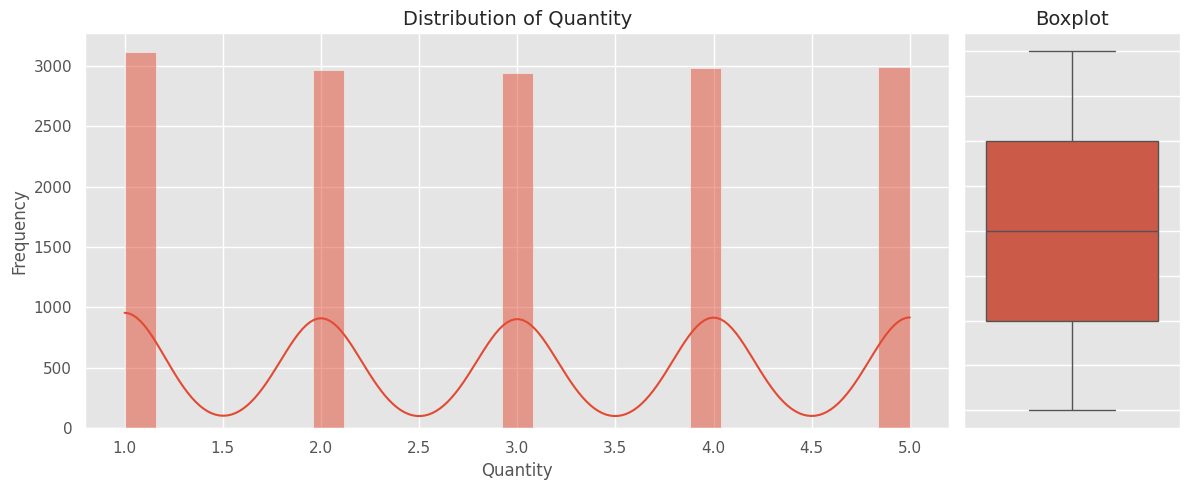

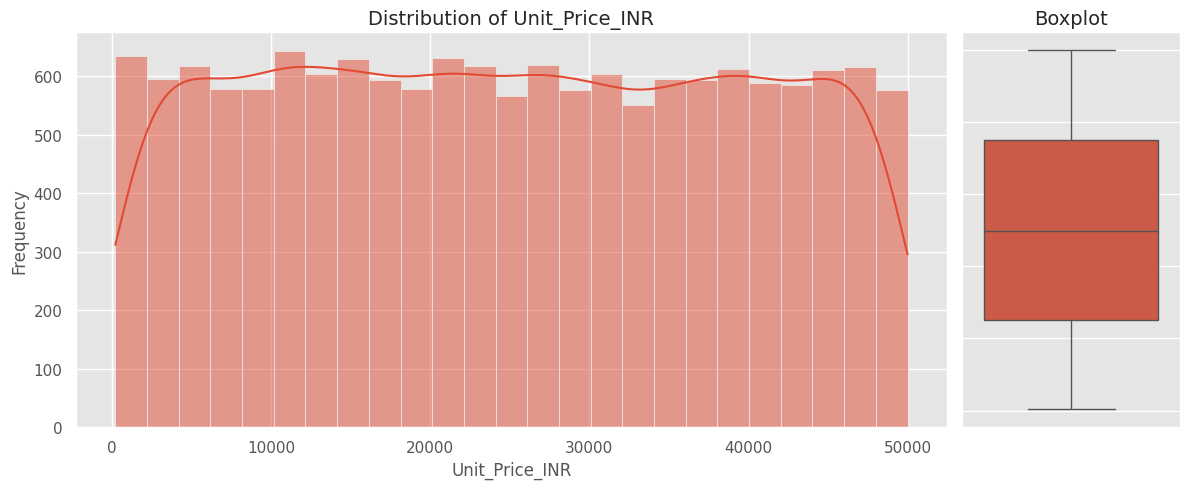

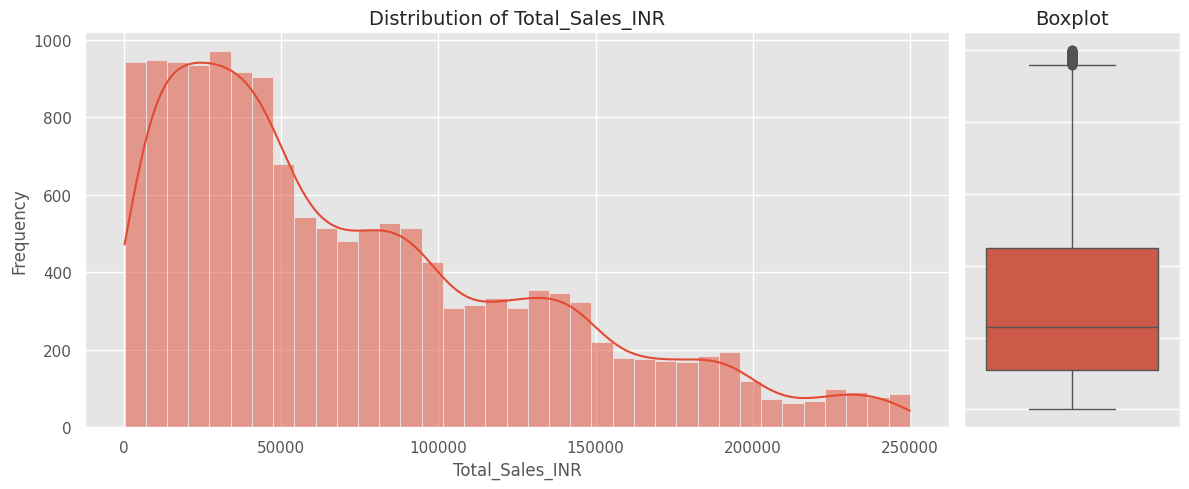

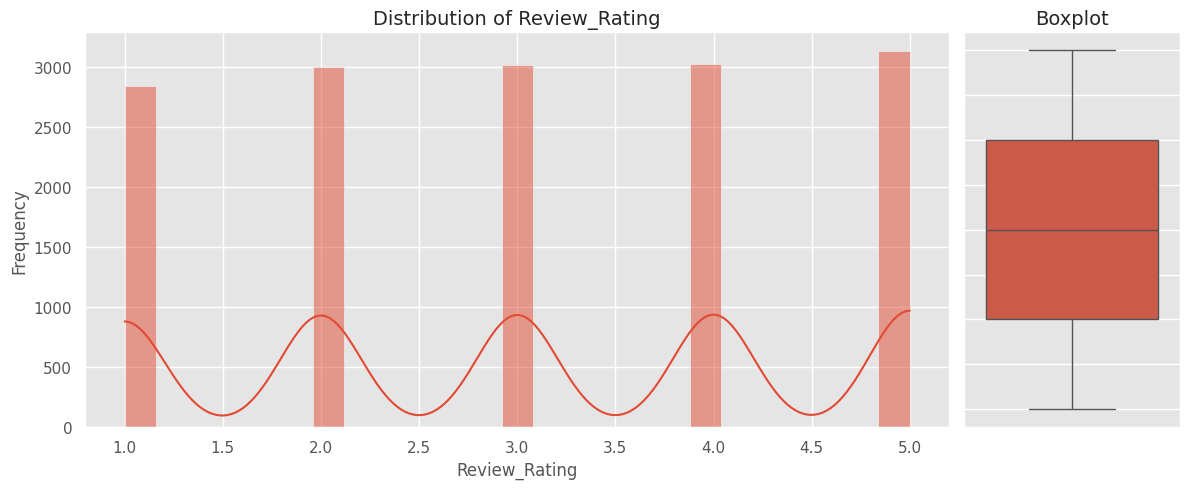

In [850]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = amazon_df.select_dtypes(include=['number']).columns

# Create a combined histogram and boxplot for each numerical column
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [0.8, 0.2]})

    # Histogram with KDE on the left
    sns.histplot(amazon_df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Boxplot on the right
    sns.boxplot(y=amazon_df[col], ax=axes[1])
    axes[1].set_ylabel('') # Hide y-axis label for the boxplot
    axes[1].tick_params(axis='y', labelleft=False) # Hide y-axis ticks for the boxplot
    axes[1].set_title('Boxplot', fontsize=14)

    plt.tight_layout()
    plt.show()

For the univariate analysis, the Quantity variable showed a discrete **uniform distribution**, meaning that customers ordered between one to five items almost equally often. This suggests that purchases are fairly balanced, and Amazon’s Diwali sales weren’t dominated by bulk buyers.

The Unit_Price_INR variable followed a **uniform** **distribution**, showing that prices are evenly spread across different ranges. There isn’t one specific price range that dominates, which indicates that Amazon offers a wide variety of products across multiple price points, which is a good sign for attracting different types of customers.

For Total_Sales_INR, the distribution was **right-skewed**,  meaning most transactions involved smaller purchase amounts while a few very large orders contributed heavily to total revenue. From a business view, this highlights how a small percentage of high-value customers can make a big difference to overall sales, which can help Amazon design targeted promotions or loyalty programs.

Lastly, the Review_Rating variable also appeared **uniform**, as ratings from one to five occur almost equally. This shows that customer opinions were balanced and not overly biased toward positive or negative experiences.

#### Categorical descriptive stats

In [851]:
print(amazon_df.select_dtypes(include=['category']).describe())

       Product_Category   Product_Name     Payment_Method  Delivery_Status         Review_Text          State  Country
count           15000              15000             15000         15000                         15000   15000   15000
unique              5                 25                 4             3                            25      28       1
top       Electronics    Children's Book  Cash on Delivery     Delivered    Satisfied with the product  Sikkim   India
freq             3036                636              3827          5075                           658     596   15000


From the categorical overview, the most common product category was **Electronics**, which appeared in 3,036 transactions. This shows that electronic products were the main driver of sales during the Diwali period, which makes sense for seasonal promotions and gift purchases.

The most frequent product name was **Children’s Book**, which appeared 636 times. This indicates consistent demand for family-oriented or educational items. This is a sign that Amazon appeals to a wide audience beyond just tech buyers.

In terms of payment methods, **Cash on Delivery** was the most used option (3,827 times). This highlights how many customers in India still prefer cash-based transactions, suggesting that Amazon’s flexibility in payment options remains important for accessibility.

For delivery status, most orders were **Delivered** (5,075 times), showing good operational performance and reliability during a high-traffic period.

Finally, the most common review text was **“Satisfied with the product,”** and the most frequent state was Sikkim. This gives a positive sign that customer satisfaction and geographic reach are strong, especially in diverse regions across India.



### Bivariate Analysis

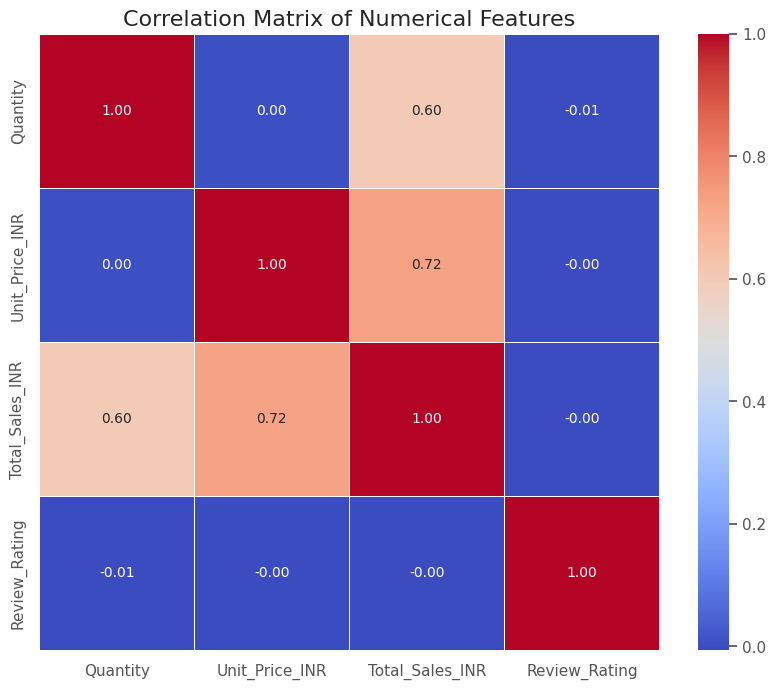

In [852]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation matrix
numerical_df = amazon_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [853]:
# Get the correlation matrix
correlation_matrix = amazon_df.select_dtypes(include=['int64', 'float64']).corr()

# Unstack the correlation matrix and drop self-correlations
correlations = correlation_matrix.unstack()
correlations = correlations[correlations.index.get_level_values(0) != correlations.index.get_level_values(1)]

# Take absolute values of correlations
absolute_correlations = correlations.abs()

# Sort absolute correlations in descending order to find strongest
highest_absolute_correlations = absolute_correlations.sort_values(ascending=False)

# Sort absolute correlations in ascending order to find weakest
lowest_absolute_correlations = absolute_correlations.sort_values(ascending=True)

# Remove duplicate pairs (e.g., A-B and B-A are the same)
highest_absolute_correlations = highest_absolute_correlations[~highest_absolute_correlations.index.map(frozenset).duplicated()]
lowest_absolute_correlations = lowest_absolute_correlations[~lowest_absolute_correlations.index.map(frozenset).duplicated()]

print("Top 3 Highest Absolute Correlations:")
print(highest_absolute_correlations.head(3))

print("\nTop 3 Lowest Absolute Correlations:")
print(lowest_absolute_correlations.head(3))

Top 3 Highest Absolute Correlations:
Total_Sales_INR  Unit_Price_INR    0.7229
Quantity         Total_Sales_INR   0.6009
                 Review_Rating     0.0058
dtype: float64

Top 3 Lowest Absolute Correlations:
Quantity         Unit_Price_INR   0.0030
Unit_Price_INR   Review_Rating    0.0035
Total_Sales_INR  Review_Rating    0.0044
dtype: float64


The correlation matrix shows that Total_Sales_INR has the strongest positive relationship with Unit_Price_INR (0.72) and Quantity (0.60). This means both how many items a customer buys and how expensive they are directly influence total sales, which makes perfect sense in a sales context.
From a business point of view, it suggests that Amazon’s revenue during Diwali is mainly driven by higher product prices and multiple-item purchases, not by customer ratings or reviews.
The other variables, like Review_Rating, show almost no correlation with sales, meaning customer satisfaction didn’t have a direct numerical impact on total sales in this dataset.

### Multivariate Analysis

Target sales

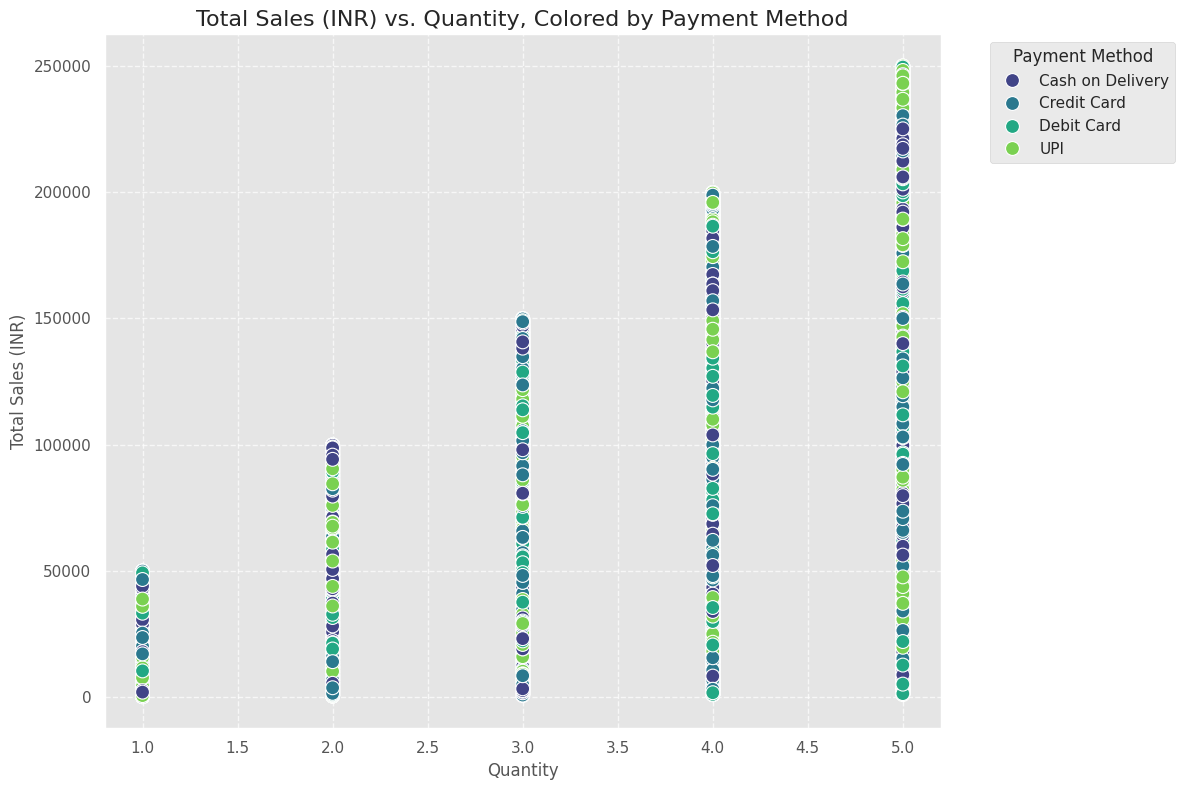

In [854]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='Quantity', y='Total_Sales_INR', hue='Payment_Method', palette='viridis', s=100)
plt.title('Total Sales (INR) vs. Quantity, Colored by Payment Method', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

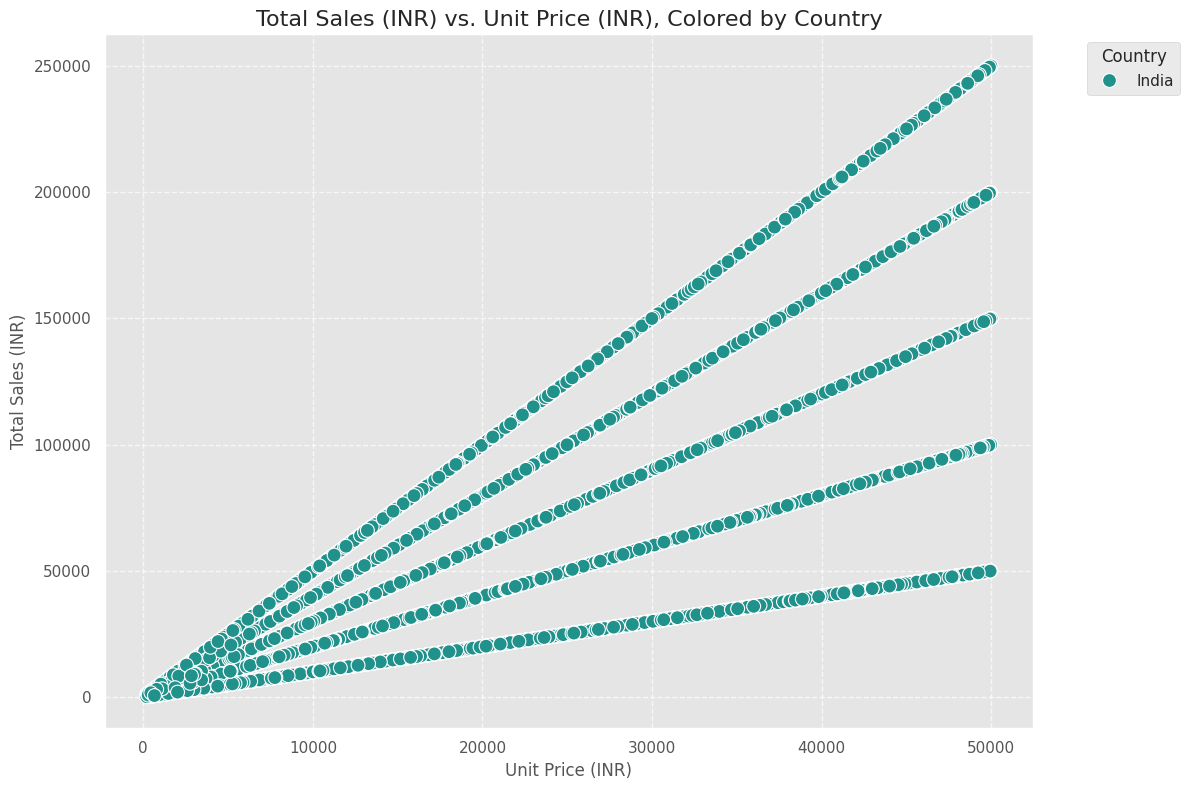

In [855]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='Unit_Price_INR', y='Total_Sales_INR', hue='Country', palette='viridis', s=100)
plt.title('Total Sales (INR) vs. Unit Price (INR), Colored by Country', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

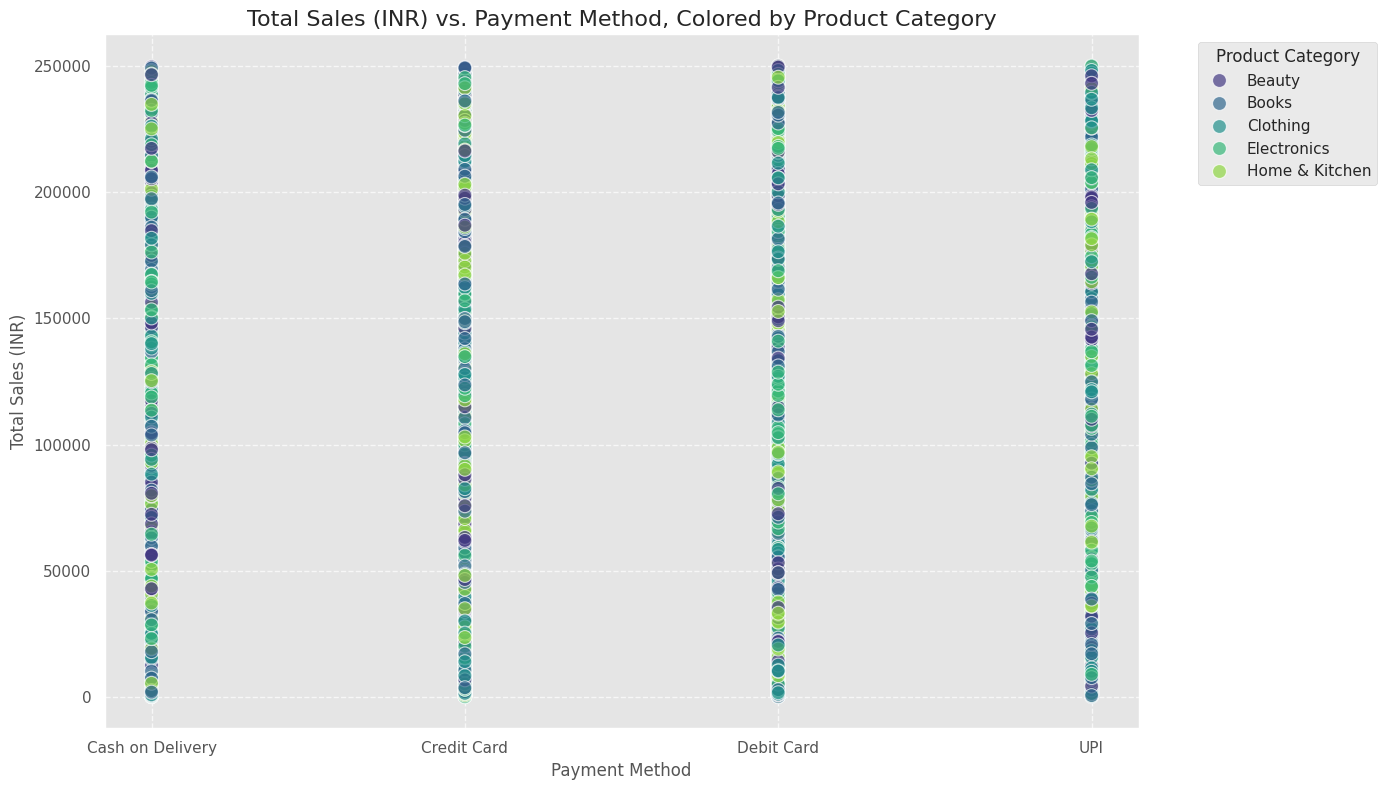

In [856]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(data=amazon_df, x='Payment_Method', y='Total_Sales_INR', hue='Product_Category', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Payment Method, Colored by Product Category', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

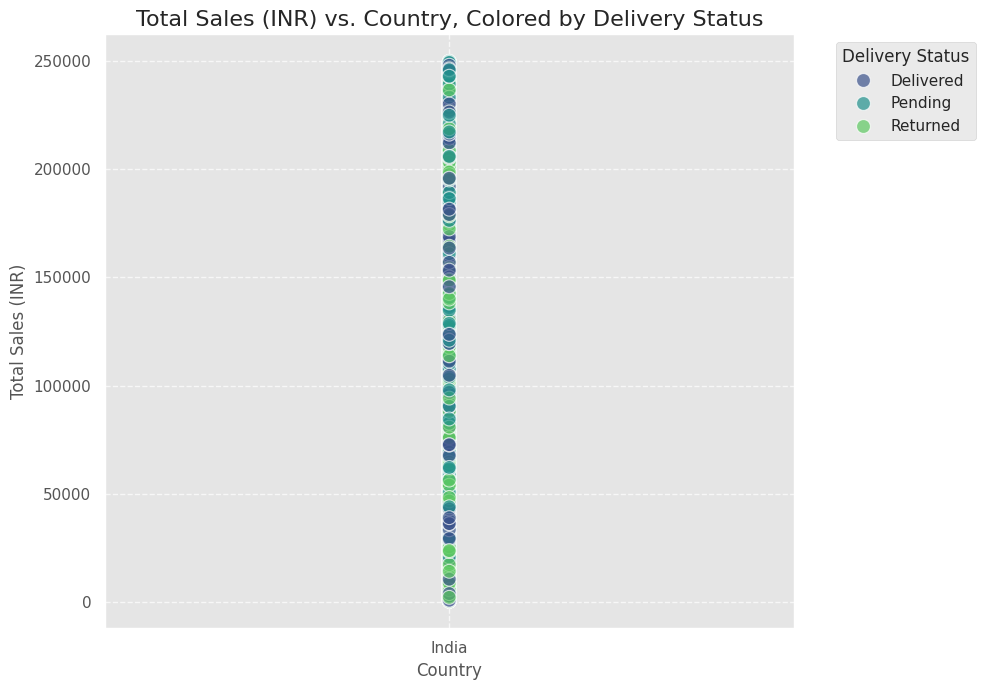

In [857]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=amazon_df, x='Country', y='Total_Sales_INR', hue='Delivery_Status', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Country, Colored by Delivery Status', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Delivery Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

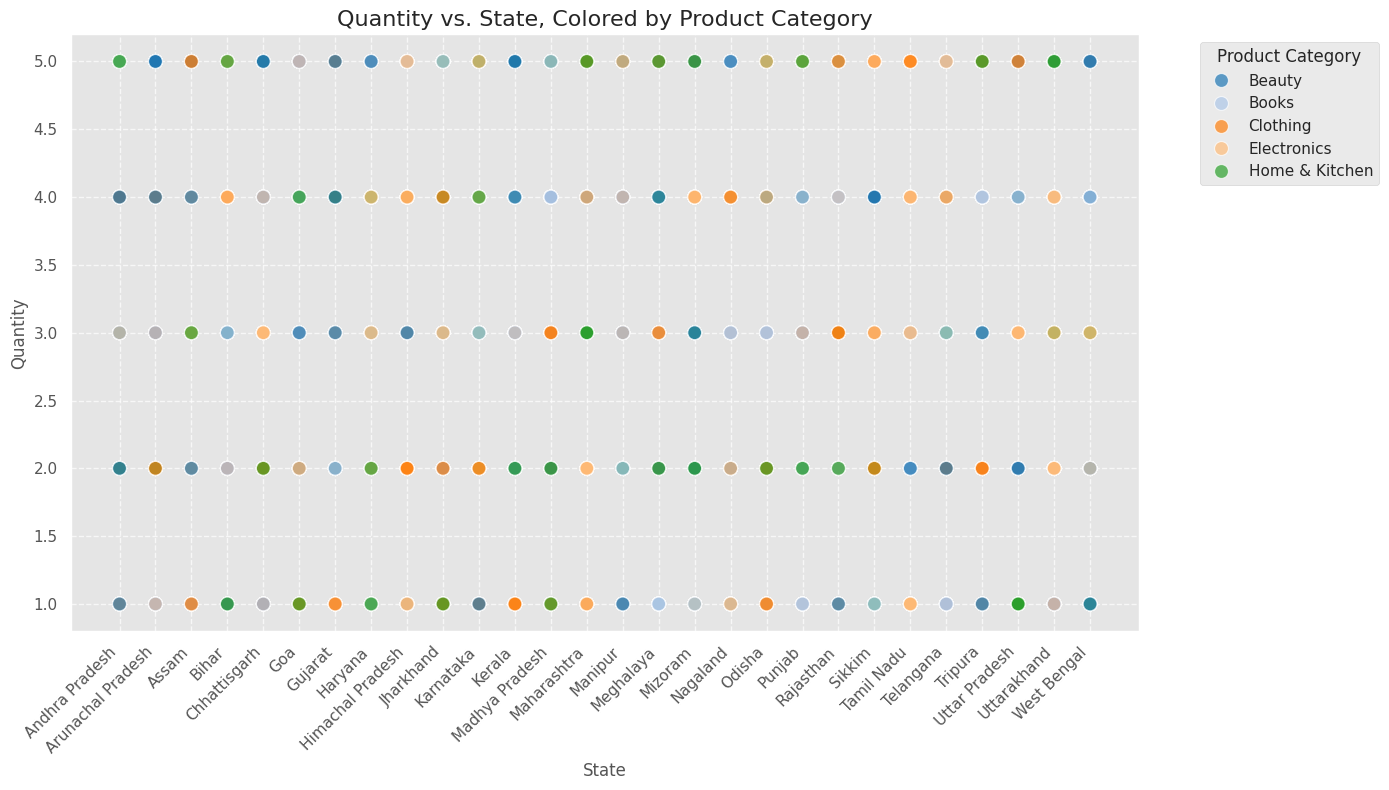

In [858]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(data=amazon_df, x='State', y='Quantity', hue='Product_Category', palette='tab20', s=100, alpha=0.7)
plt.title('Quantity vs. State, Colored by Product Category', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout()
plt.show()

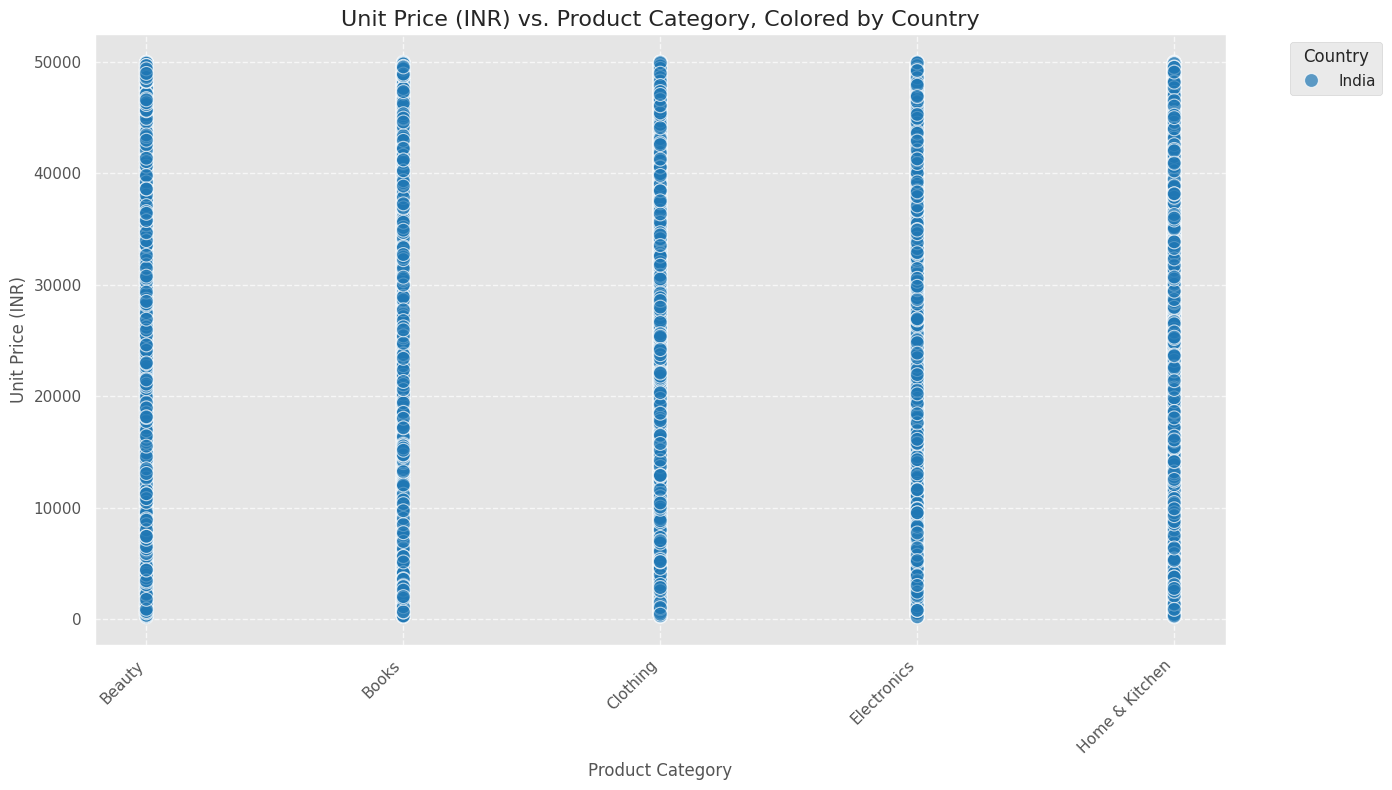

In [859]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(data=amazon_df, x='Product_Category', y='Unit_Price_INR', hue='Country', palette='tab10', s=100, alpha=0.7)
plt.title('Unit Price (INR) vs. Product Category, Colored by Country', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Unit Price (INR)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout()
plt.show()

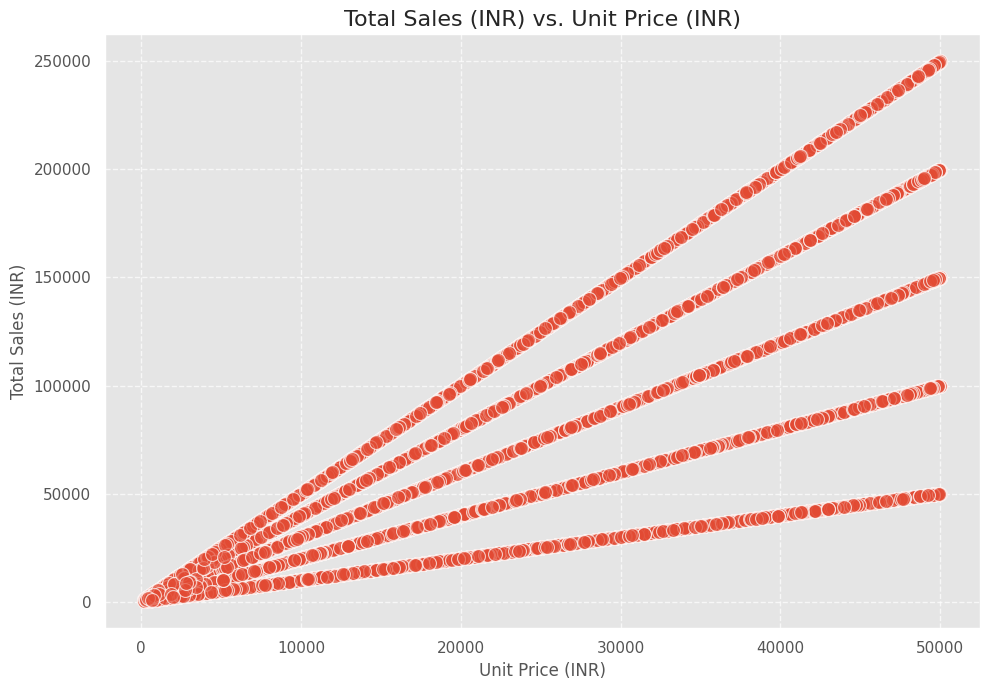

In [860]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=amazon_df, x='Unit_Price_INR', y='Total_Sales_INR', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Unit Price (INR)', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

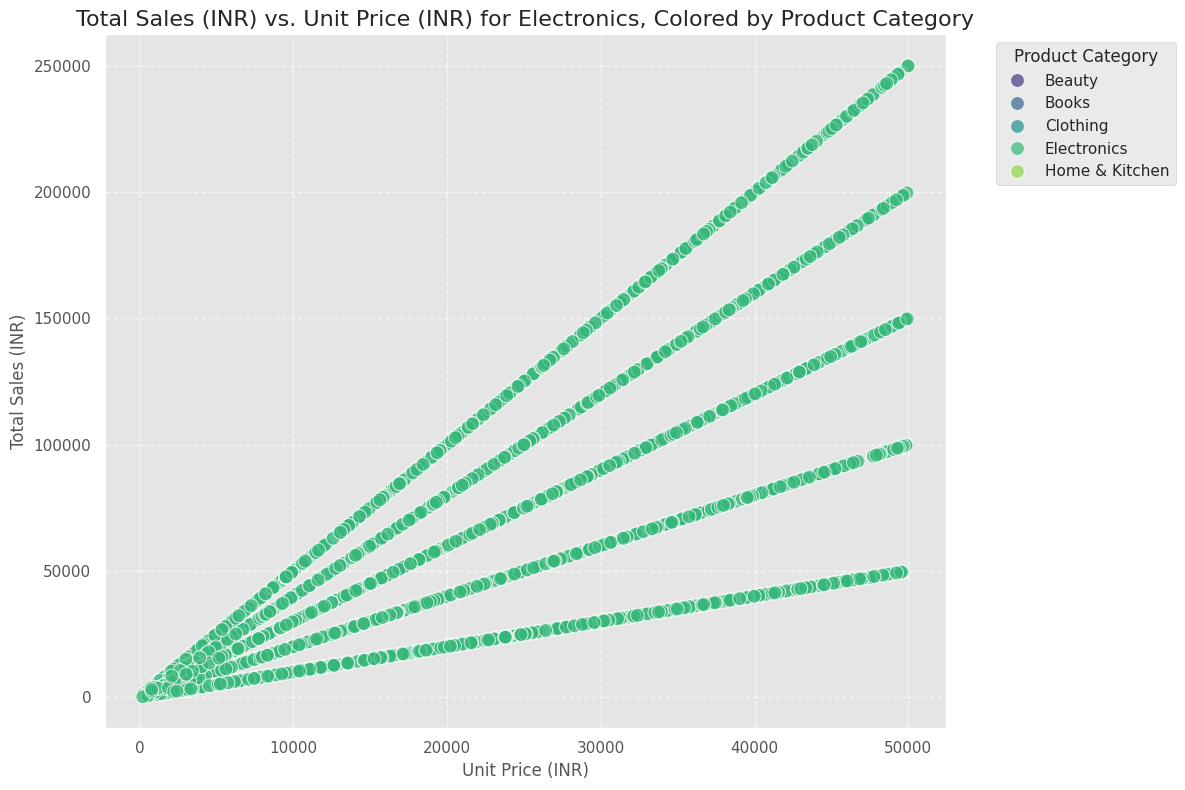

In [861]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for only 'Electronics' product category
electronics_df = amazon_df[amazon_df['Product_Category'] == 'Electronics']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=electronics_df, x='Unit_Price_INR', y='Total_Sales_INR', hue='Product_Category', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Unit Price (INR) for Electronics, Colored by Product Category', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

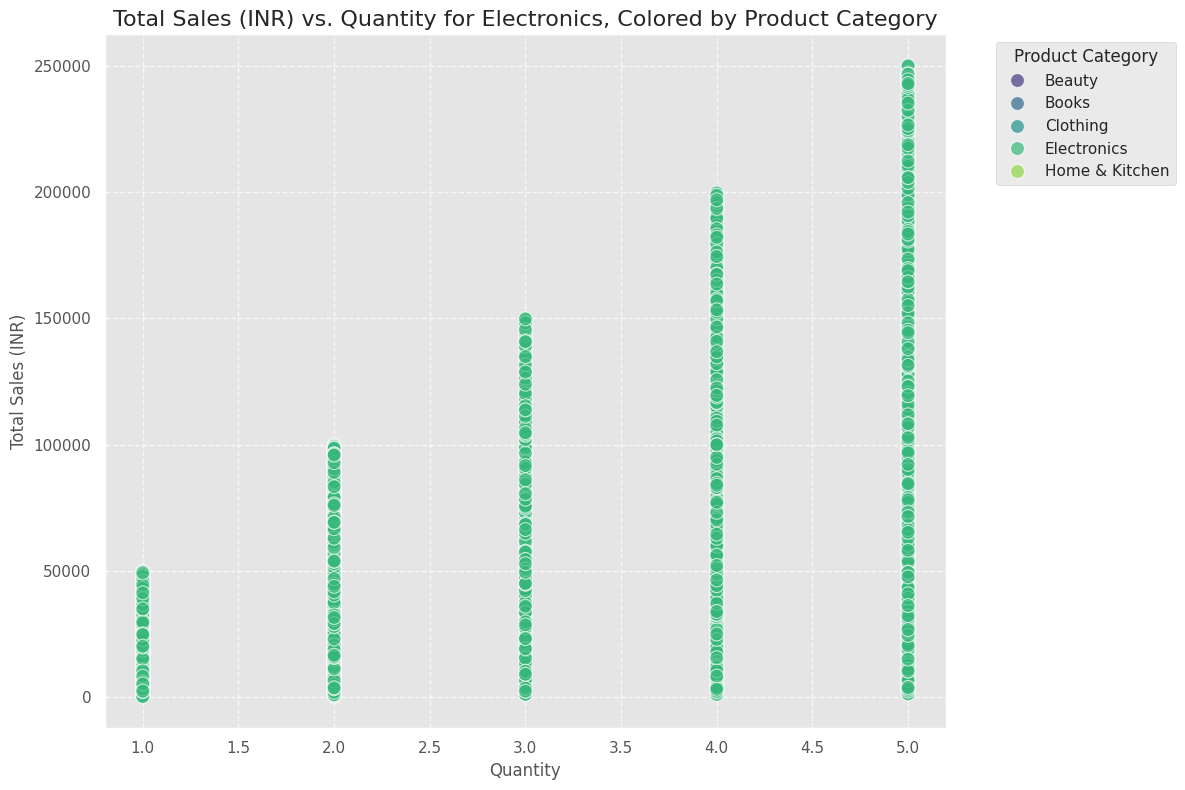

In [862]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for only 'Electronics' product category
electronics_df = amazon_df[amazon_df['Product_Category'] == 'Electronics']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=electronics_df, x='Quantity', y='Total_Sales_INR', hue='Product_Category', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Quantity for Electronics, Colored by Product Category', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

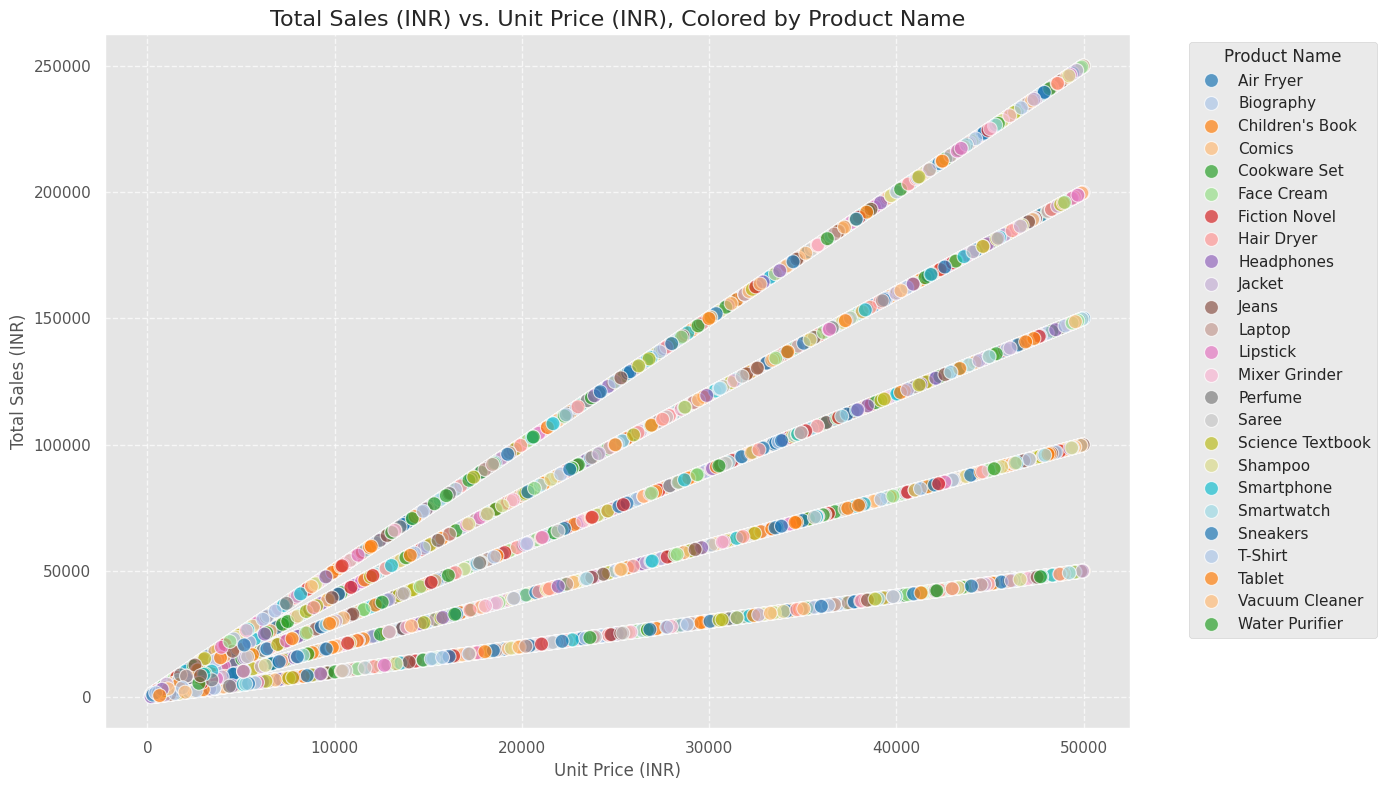

In [863]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(data=amazon_df, x='Unit_Price_INR', y='Total_Sales_INR', hue='Product_Name', palette='tab20', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Unit Price (INR), Colored by Product Name', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

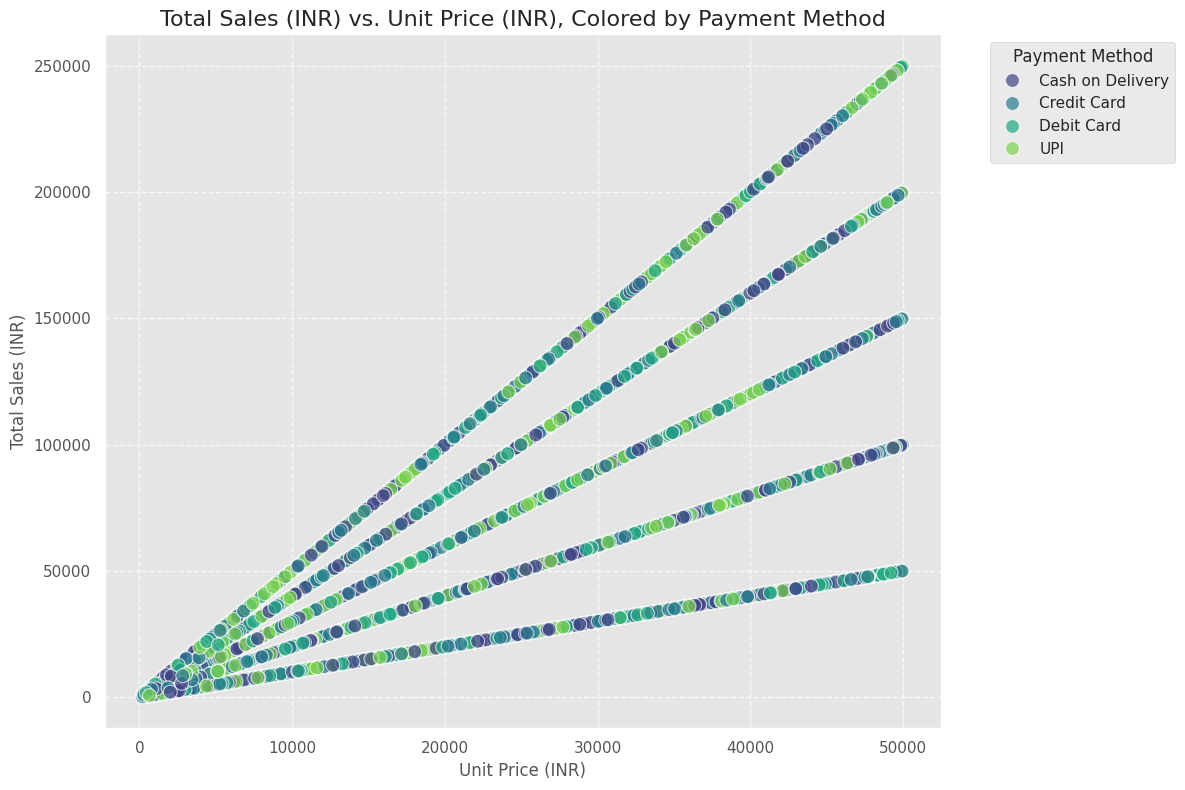

In [864]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='Unit_Price_INR', y='Total_Sales_INR', hue='Payment_Method', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Unit Price (INR), Colored by Payment Method', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

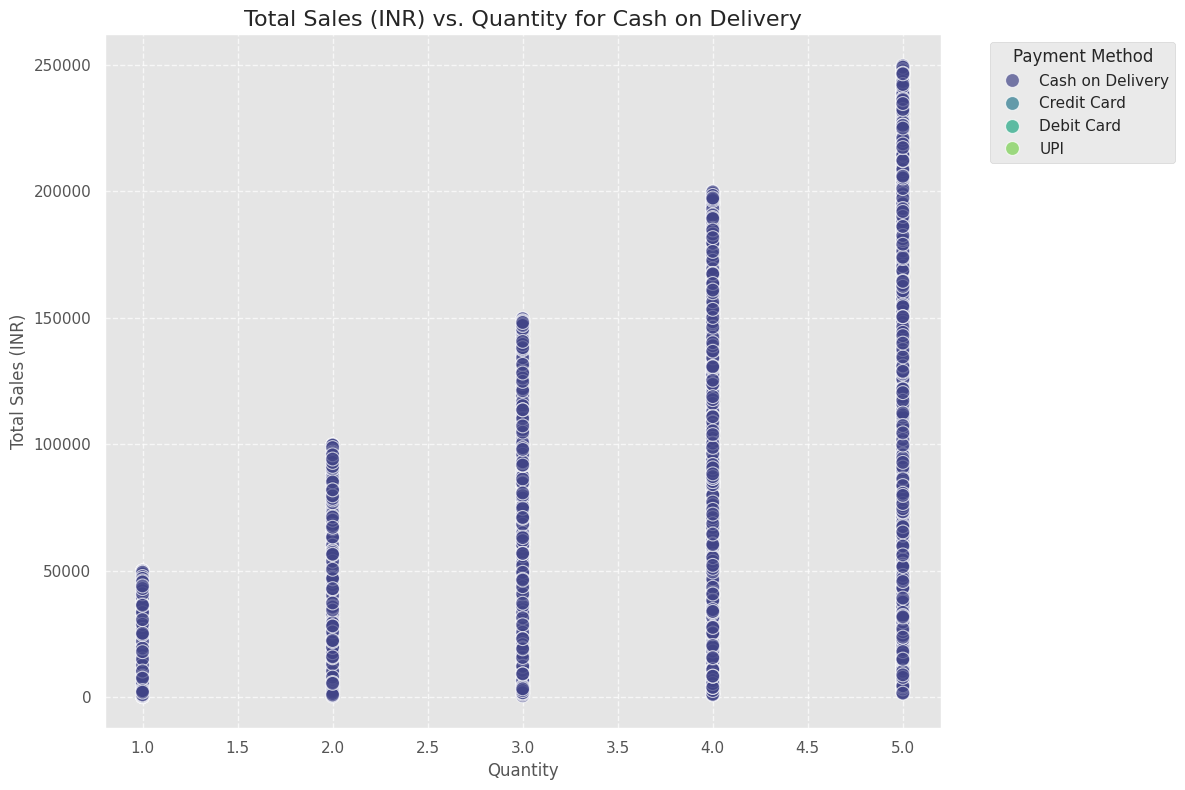

In [865]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for only 'Cash on Delivery' payment method
cod_df = amazon_df[amazon_df['Payment_Method'] == 'Cash on Delivery']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=cod_df, x='Quantity', y='Total_Sales_INR', hue='Payment_Method', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Quantity for Cash on Delivery', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

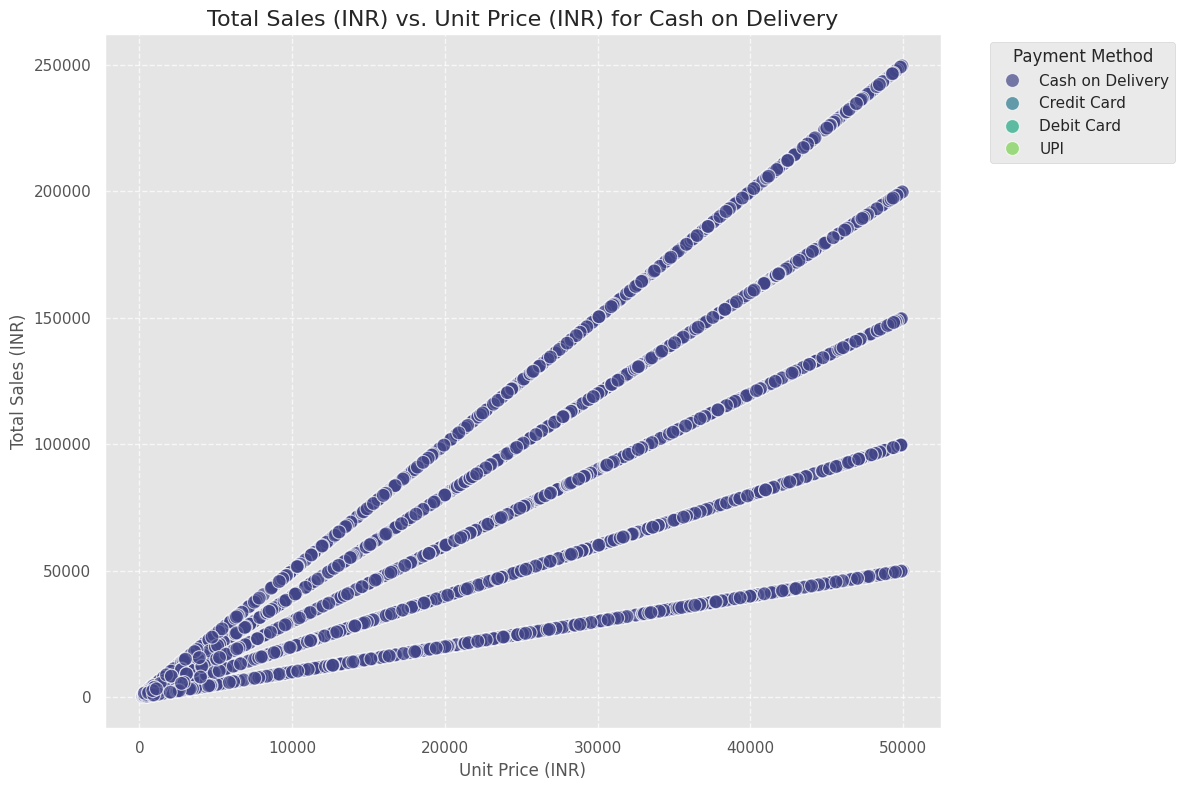

In [866]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for only 'Cash on Delivery' payment method
cod_df = amazon_df[amazon_df['Payment_Method'] == 'Cash on Delivery']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=cod_df, x='Unit_Price_INR', y='Total_Sales_INR', hue='Payment_Method', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Unit Price (INR) for Cash on Delivery', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

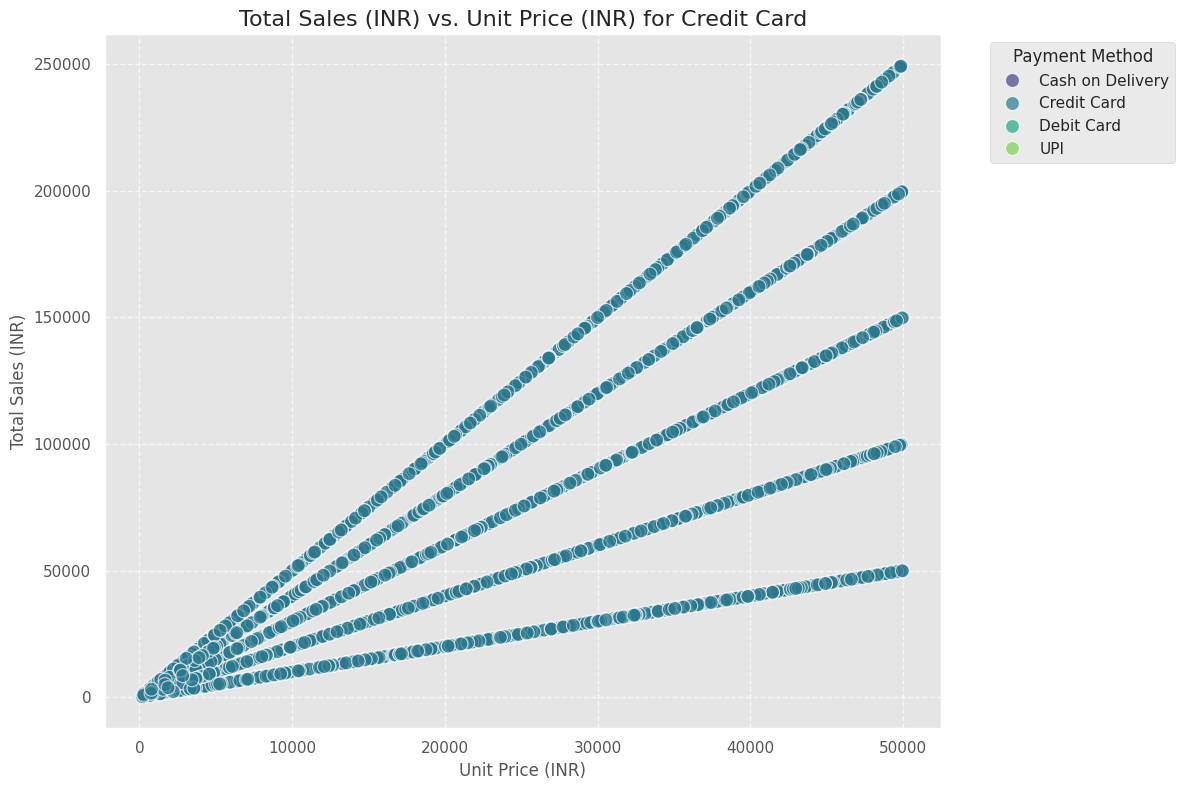

In [867]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for only 'Credit Card' payment method
cc_df = amazon_df[amazon_df['Payment_Method'] == 'Credit Card']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=cc_df, x='Unit_Price_INR', y='Total_Sales_INR', hue='Payment_Method', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Unit Price (INR) for Credit Card', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Key Plots to Consider

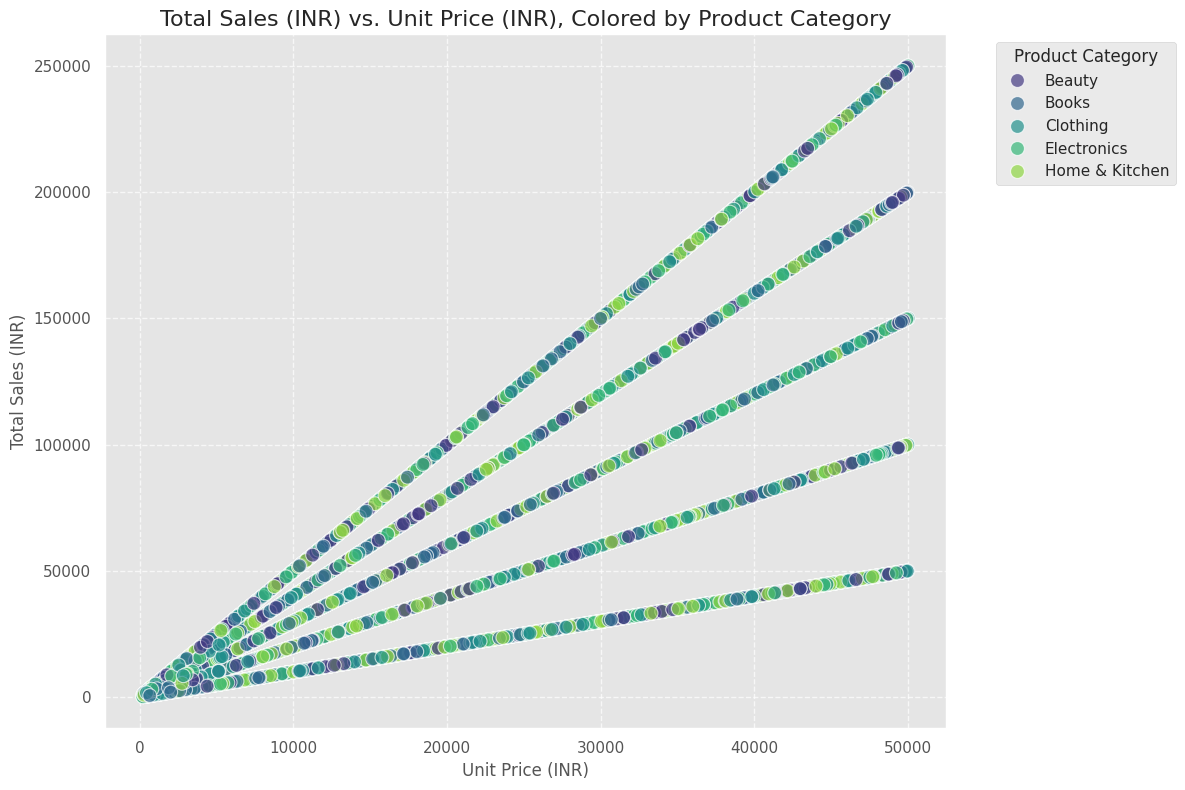

In [868]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='Unit_Price_INR', y='Total_Sales_INR', hue='Product_Category', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Unit Price (INR), Colored by Product Category', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

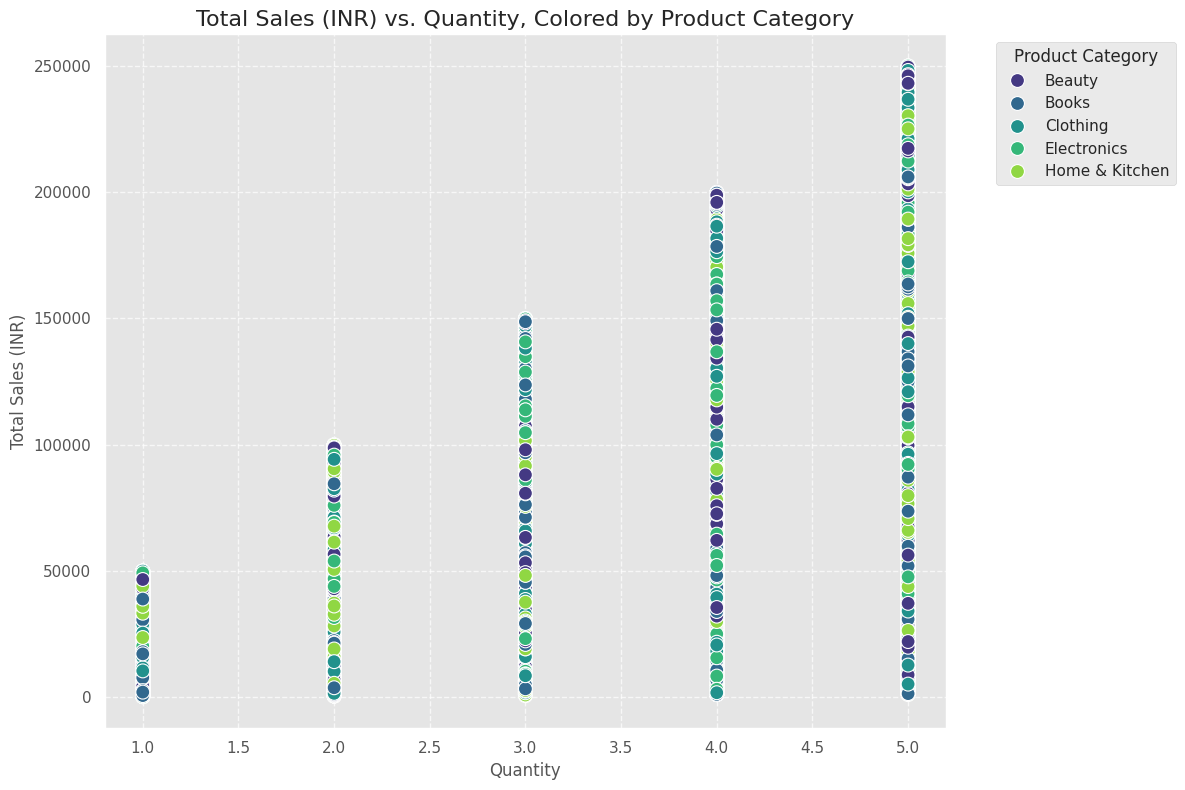

In [869]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='Quantity', y='Total_Sales_INR', hue='Product_Category', palette='viridis', s=100)
plt.title('Total Sales (INR) vs. Quantity, Colored by Product Category', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

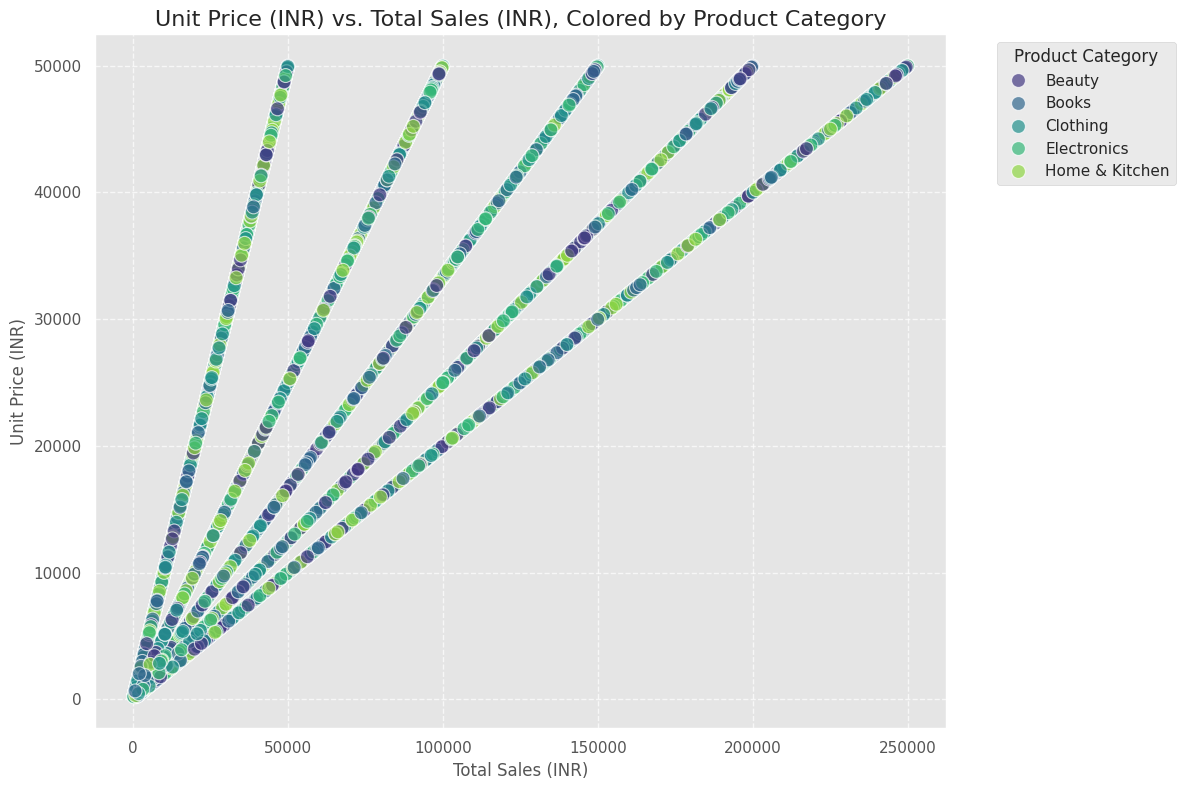

In [870]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='Total_Sales_INR', y='Unit_Price_INR', hue='Product_Category', palette='viridis', s=100, alpha=0.7)
plt.title('Unit Price (INR) vs. Total Sales (INR), Colored by Product Category', fontsize=16)
plt.xlabel('Total Sales (INR)', fontsize=12)
plt.ylabel('Unit Price (INR)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

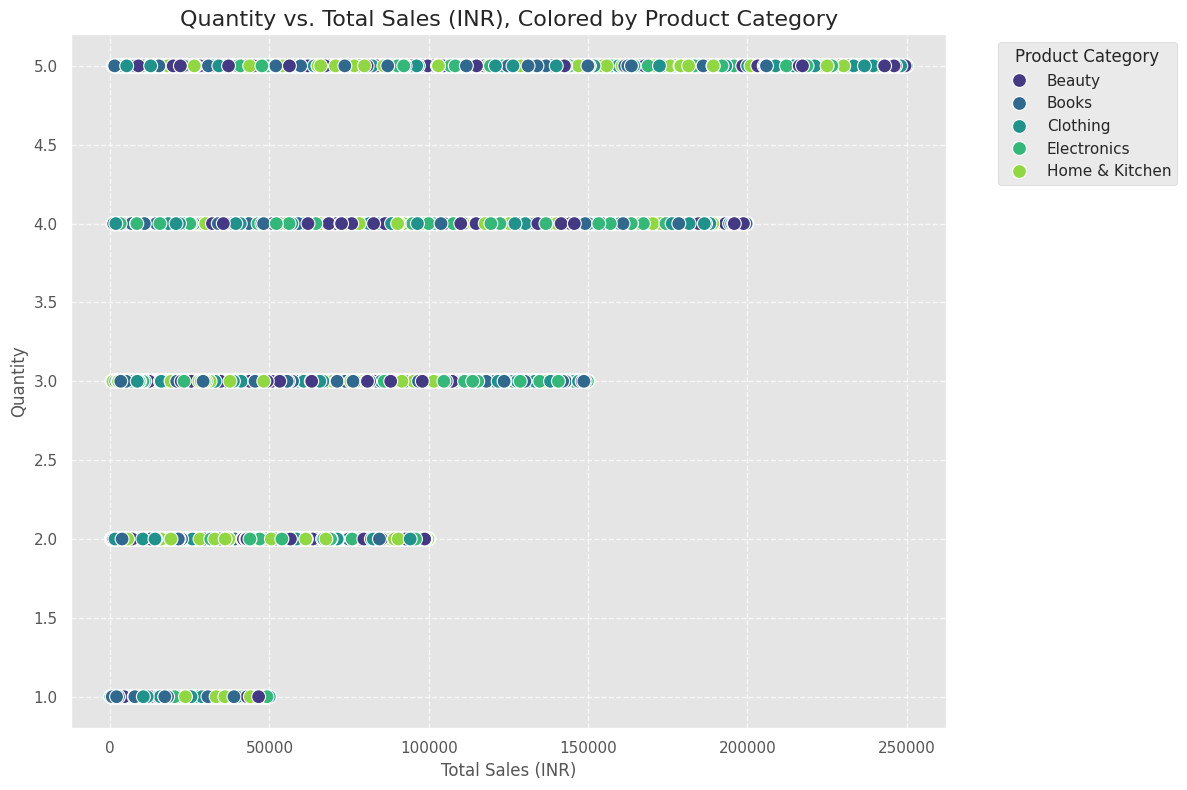

In [871]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='Total_Sales_INR', y='Quantity', hue='Product_Category', palette='viridis', s=100)
plt.title('Quantity vs. Total Sales (INR), Colored by Product Category', fontsize=16)
plt.xlabel('Total Sales (INR)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

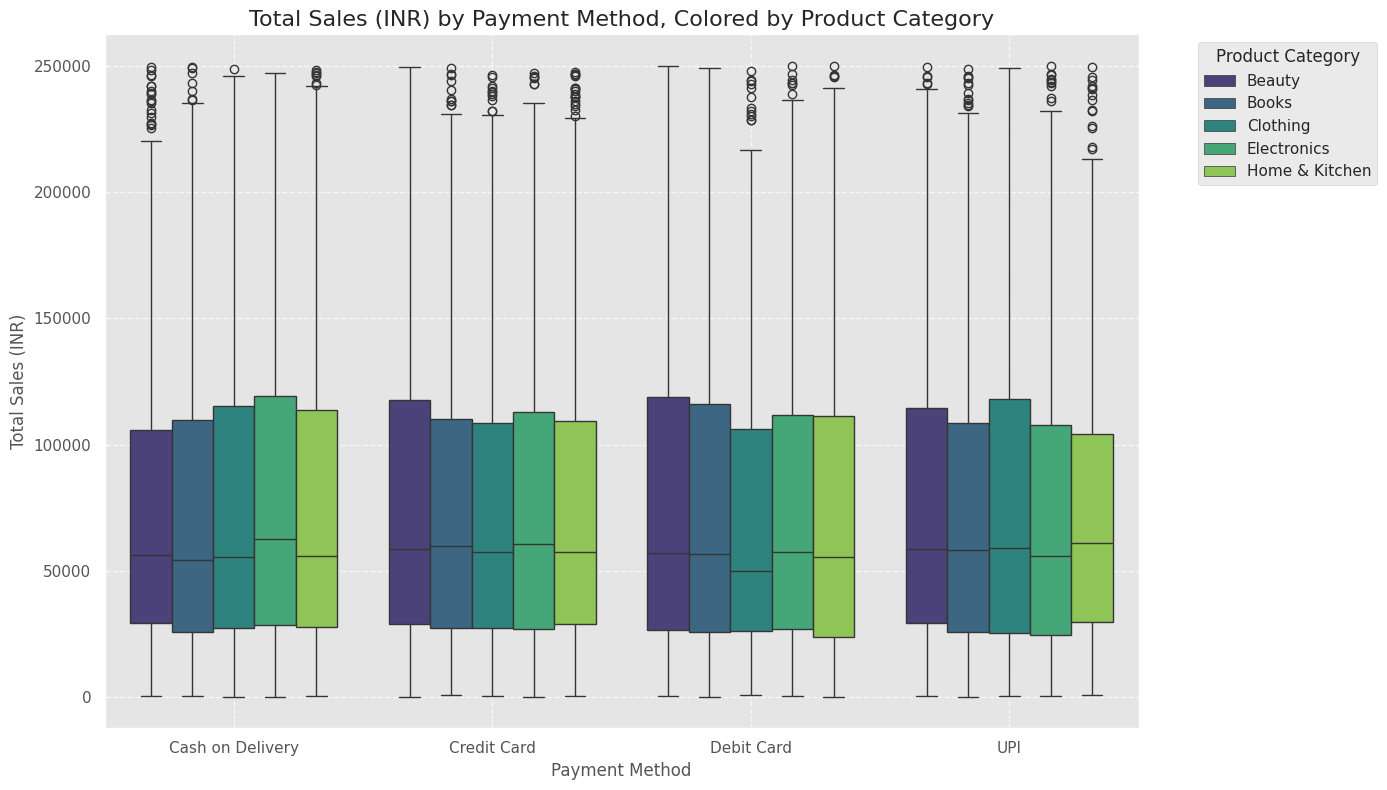

In [872]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=amazon_df, x='Payment_Method', y='Total_Sales_INR', hue='Product_Category', palette='viridis')
plt.title('Total Sales (INR) by Payment Method, Colored by Product Category', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

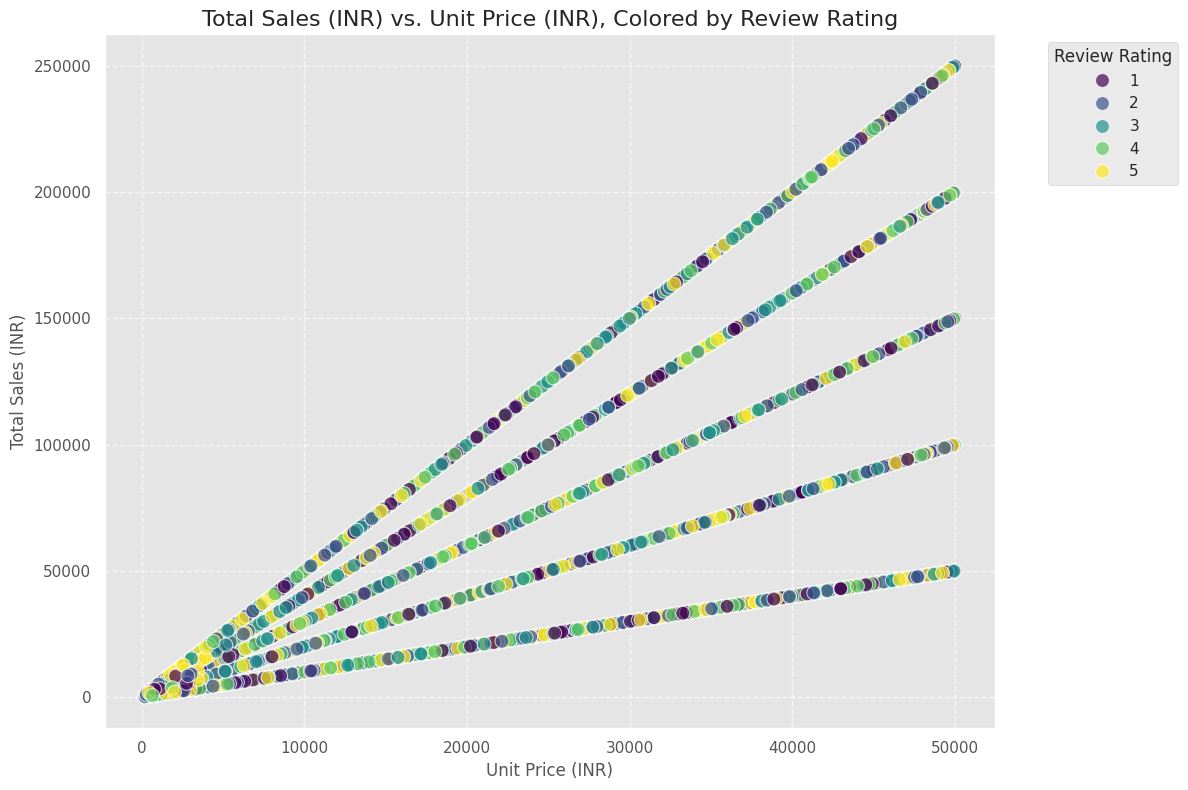

In [873]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=amazon_df, x='Unit_Price_INR', y='Total_Sales_INR', hue='Review_Rating', palette='viridis', s=100, alpha=0.7)
plt.title('Total Sales (INR) vs. Unit Price (INR), Colored by Review Rating', fontsize=16)
plt.xlabel('Unit Price (INR)', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend(title='Review Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Multivariate Analysis Insight**:

From the multivariate exploration, the relationship between **Total Sales and Unit Price, colored by product category**, showed a clear upward trend. Higher-priced products, especially in Electronics and Home & Kitchen, consistently generated the highest total sales. This confirms that premium items were the main sales drivers during the Diwali period.

When looking at **Total Sales and Quantity colored by product category**, the pattern was also positive, as sales increased as more units were sold. However, categories like Electronics, Clothing and Home & Kitchen reached high sales even with smaller quantities, while Books and Beauty relied on larger volumes. This suggests category-based pricing efficiency and consumer demand differences (differences in how demand and pricing work depending on the category).

**The Payment Method and Total Sales boxplot by product category** shows that overall, spending patterns look pretty similar across all payment methods. Whether customers paid by Cash on Delivery, Credit Card, Debit Card, or UPI, there isn’t a big gap in total sales between them, which means people tend to spend about the same amount regardless of how they pay. Still, Cash on Delivery seems slightly more common, showing that many shoppers still rely on it, even during big sale seasons. So, payment choice doesn’t seem to change how much customers spend ; it’s more about convenience and personal preference.

Lastly, analyzing Total Sales against Unit Price by Review Rating showed that even products with average ratings still performed well in sales. This suggests that customers prioritized price and convenience over reviews during festive shopping periods.

Overall, the data indicates that **price, quantity, and product category are the strongest predictors of total sales**, while payment method and location provide valuable behavioral context for modeling future performance.

## 4.Model Developpement


In [874]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = amazon_df[['Unit_Price_INR', 'Quantity']]
y = amazon_df['Total_Sales_INR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the equation of the line
print("Equation of the line:")
print(f"Total_Sales_INR = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Unit_Price_INR) + ({model.coef_[1]:.2f} * Quantity)")

# Calculate and print R2 score
r2 = r2_score(y_test, y_pred)
print(f"\nR2 Score: {r2:.4f}")

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Equation of the line:
Total_Sales_INR = -74559.55 + (2.98 * Unit_Price_INR) + (25036.88 * Quantity)

R2 Score: 0.8753
MSE: 437958868.00
Mean Absolute Error (MAE): 15497.3994


For my baseline model, I started with a simple Linear Regression; no scaling, no outlier removal, just the raw data. The equation of the line was :

Total_Sales_INR = -74559.55 + (2.98 × Unit_Price_INR) + (25036.88 × Quantity).

 The model gave an R² of 0.8753, meaning it predicts total sales with around 87% accuracy, which is a solid start. The MSE of 437,958,868 shows there’s a lot of error, especially for higher transaction values. Overall, it already shows a clear relationship between price, quantity, and total sales, which Amazon could use to understand how these factors drive revenue but the model is not reliable since it has a lot of errors.  

#### Outliers removal

I checked for outliers across all the numerical columns in the Univariate Analysis, and the only ones that appeared were in Total_Sales_INR, which is actually the target variable. Since total sales naturally vary based on order size and price, these values are valid and not errors. The other numerical features (Quantity, Unit_Price_INR, and Review_Rating) didn’t show any significant outliers, so there was no need to remove anything.

#### Scaling

In [875]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create copies of the DataFrame for scaling
amazon_minmax_df = amazon_df.copy()
amazon_standard_df = amazon_df.copy()

# Identify numerical columns for scaling (excluding 'Month' if it was added and needs special handling, but here 'Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Review_Rating' are clearly numerical)
numerical_cols_for_scaling = ['Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Review_Rating']

# Initialize MinMaxScaler and StandardScaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler to numerical columns of amazon_minmax_df
amazon_minmax_df[numerical_cols_for_scaling] = min_max_scaler.fit_transform(amazon_minmax_df[numerical_cols_for_scaling])

# Apply StandardScaler to numerical columns of amazon_standard_df
amazon_standard_df[numerical_cols_for_scaling] = standard_scaler.fit_transform(amazon_standard_df[numerical_cols_for_scaling])

print("amazon_minmax_df head after Min-Max Scaling:")
display(amazon_minmax_df.head())

print("\namazon_standard_df head after Standard Scaling:")
display(amazon_standard_df.head())


amazon_minmax_df head after Min-Max Scaling:


Date    Product_Category  Product_Name  Quantity  Unit_Price_INR  Total_Sales_INR   Payment_Method  Delivery_Status  Review_Rating     Review_Text       State    Country
0 2025-01-25  Home & Kitchen   Cookware Set   0.2500       0.5096          0.2040            Credit Card      Returned       0.0000          Waste of money     Sikkim   India
1 2025-08-28          Beauty     Hair Dryer   0.0000       0.3848          0.0767             Debit Card      Returned       1.0000      Excellent product!  Telangana   India
2 2025-02-27     Electronics         Tablet   0.5000       0.7687          0.4614       Cash on Delivery     Delivered       0.5000               Fair deal   Nagaland   India
3 2025-02-24     Electronics     Headphones   1.0000       0.7620          0.7629            Credit Card     Delivered       1.0000       Highly recommend!      Assam   India
4 2025-06-15        Clothing          Saree   1.0000       0.9186          0.9189                    UPI     Delivered       1.0000       Highly recommend!     Odisha   India


amazon_standard_df head after Standard Scaling:


Date    Product_Category  Product_Name  Quantity  Unit_Price_INR  Total_Sales_INR   Payment_Method  Delivery_Status  Review_Rating     Review_Text       State    Country
0 2025-01-25  Home & Kitchen   Cookware Set  -0.6921       0.0430         -0.3941            Credit Card      Returned      -1.4459          Waste of money     Sikkim   India
1 2025-08-28          Beauty     Hair Dryer  -1.3949      -0.3884         -0.9295             Debit Card      Returned       1.3890      Excellent product!  Telangana   India
2 2025-02-27     Electronics         Tablet   0.0108       0.9389          0.6887       Cash on Delivery     Delivered      -0.0284               Fair deal   Nagaland   India
3 2025-02-24     Electronics     Headphones   1.4165       0.9159          1.9570            Credit Card     Delivered       1.3890       Highly recommend!      Assam   India
4 2025-06-15        Clothing          Saree   1.4165       1.4573          2.6136                    UPI     Delivered       1.3890       Highly recommend!     Odisha   India

In [876]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y) from the min-max scaled DataFrame
X_minmax = amazon_minmax_df[['Unit_Price_INR', 'Quantity']]
y_minmax = amazon_minmax_df['Total_Sales_INR']

# Split the data into training and testing sets
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train_minmax)

# Make predictions on the test set
y_pred_minmax = model_minmax.predict(X_test_minmax)

# Print the equation of the line
print("Equation of the line (Min-Max Scaled):")
print(f"Total_Sales_INR = {model_minmax.intercept_:.2f} + ({model_minmax.coef_[0]:.2f} * Unit_Price_INR) + ({model_minmax.coef_[1]:.2f} * Quantity)")

# Calculate and print R2 score
r2_minmax = r2_score(y_test_minmax, y_pred_minmax)
print(f"\nR2 Score (Min-Max Scaled): {r2_minmax:.4f}")

# Calculate and print Mean Squared Error (MSE)
mse_minmax = mean_squared_error(y_test_minmax, y_pred_minmax)
print(f"MSE (Min-Max Scaled): {mse_minmax:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")



Equation of the line (Min-Max Scaled):
Total_Sales_INR = -0.20 + (0.59 * Unit_Price_INR) + (0.40 * Quantity)

R2 Score (Min-Max Scaled): 0.8753
MSE (Min-Max Scaled): 0.01
Mean Absolute Error: 15497.3994


- High R2 - MSE is very close to zero , the model is too perfect, and we don't want that. It closely memorized what we have.

In [877]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y) from the standard-scaled DataFrame
X_standard = amazon_standard_df[['Unit_Price_INR', 'Quantity']]
y_standard = amazon_standard_df['Total_Sales_INR']

# Split the data into training and testing sets
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model_standard = LinearRegression()
model_standard.fit(X_train_standard, y_train_standard)

# Make predictions on the test set
y_pred_standard = model_standard.predict(X_test_standard)

# Print the equation of the line
print("Equation of the line (Standard Scaled):")
print(f"Total_Sales_INR = {model_standard.intercept_:.2f} + ({model_standard.coef_[0]:.2f} * Unit_Price_INR) + ({model_standard.coef_[1]:.2f} * Quantity)")


# Calculate and print R2 score
r2_standard = r2_score(y_test_standard, y_pred_standard)
print(f"\nR2 Score (Standard Scaled): {r2_standard:.4f}")

# Calculate and print Mean Squared Error (MSE)
mse_standard = mean_squared_error(y_test_standard, y_pred_standard)
print(f"MSE (Standard Scaled): {mse_standard:.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Equation of the line (Standard Scaled):
Total_Sales_INR = 0.00 + (0.72 * Unit_Price_INR) + (0.60 * Quantity)

R2 Score (Standard Scaled): 0.8753
MSE (Standard Scaled): 0.12
Mean Absolute Error (MAE): 15497.3994


I scaled the dataset using both MinMaxScaler and StandardScaler to see how it would affect the Linear Regression results. With MinMax scaling, the model gave an R² of 0.8753 and an MSE of 0.01, while with Standard scaling, it gave the same R² (0.8753) but an MSE of 0.12. Even though the MinMax model looked “too good, too perfect” on paper, the near-perfect error made it feel unrealistic as if it was predicting everything perfectly, which usually means it’s overfitting. So I decided to go with the StandardScaler instead, since it felt more stable and reliable for future predictions.

## 5.Feature Selection

### Kbest

In [878]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# X = all features except the target
X = amazon_standard_df.drop(columns=['Total_Sales_INR'])
# y = target variable
y = amazon_standard_df['Total_Sales_INR']

# Keep only numeric columns (f_regression works with numbers)
X_num = X.select_dtypes(include=['float64', 'int64'])

# KBest: select top 3 features
k = 3
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_num, y)

# Get the names of the selected features
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_num.columns[selected_indices]

print("Selected Features:", list(selected_feature_names))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Selected Features: ['Quantity', 'Unit_Price_INR', 'Review_Rating']
Mean Absolute Error: 0.2612
R² Score: 0.8753
Mean Squared Error: 0.1243
Mean Absolute Error (MAE): 0.2612


In [879]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# X = all features except the target
X = amazon_standard_df.drop(columns=['Total_Sales_INR'])
# y = target variable
y = amazon_standard_df['Total_Sales_INR']

# Keep only numeric columns (f_regression works with numbers)
X_num = X.select_dtypes(include=['float64', 'int64'])

# KBest: select top 3 features
k = 2
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_num, y)

# Get the names of the selected features
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_num.columns[selected_indices]

print("Selected Features:", list(selected_feature_names))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Selected Features: ['Quantity', 'Unit_Price_INR']
R² Score: 0.8753
Mean Squared Error: 0.1243
Mean Absolute Error (MAE): 0.2610


In [880]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# X = all features except the target
X = amazon_standard_df.drop(columns=['Total_Sales_INR'])
# y = target variable
y = amazon_standard_df['Total_Sales_INR']

# Keep only numeric columns (f_regression works with numbers)
X_num = X.select_dtypes(include=['float64', 'int64'])

# KBest: select top 3 features
k = 1
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_num, y)

# Get the names of the selected features
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_num.columns[selected_indices]

print("Selected Features:", list(selected_feature_names))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Selected Features: ['Unit_Price_INR']
R² Score: 0.5141
Mean Squared Error: 0.4843
Mean Absolute Error (MAE): 0.5129


For feature selection, I used KBest to identify the most relevant variables contributing to predicting total sales. Running K=3 gave me an R² of 0.8753 and an MSE of 0.1243, while K=2, using only Quantity and Unit_Price_INR, showed the same results. I decided to keep K=2 since it’s simpler, more efficient, and cheaper while maintaining the same level of accuracy. Amazon can focus on optimizing these two key factors(product quantity and pricing)since they’re the strongest drivers of total sales performance.

### Lasso

In [881]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

df = amazon_standard_df.copy()

# --- Define features and target ---
X = df.drop(columns=['Total_Sales_INR'])
y = df['Total_Sales_INR']

# --- Keep numeric columns only for Lasso (it ignores Date but doesn’t delete it from df) ---
X_num = X.select_dtypes(include=['number'])

# --- Split, train, test ---
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

selected_features = X_num.columns[model.coef_ != 0]
print("Selected Features by Lasso:", list(selected_features))
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R² Score: 0.8582
Mean Squared Error: 0.1414
Selected Features by Lasso: ['Quantity', 'Unit_Price_INR']
Mean Absolute Error (MAE): 0.2808


In [882]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = df.drop(columns=['Total_Sales_INR'])
y = df['Total_Sales_INR']

# Keep only numeric columns (in case there are any leftover text columns)
X_num = X.select_dtypes(include=['float64', 'int64'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train Lasso regression model
model = Lasso(alpha=0.001, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Show which features Lasso kept
selected_features = X_num.columns[model.coef_ != 0]
print("Selected Features by Lasso:", list(selected_features))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R² Score: 0.8754
Mean Squared Error: 0.1242
Selected Features by Lasso: ['Quantity', 'Unit_Price_INR', 'Review_Rating']
Mean Absolute Error (MAE): 0.2612


In [883]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = df.drop(columns=['Total_Sales_INR'])
y = df['Total_Sales_INR']

# Keep only numeric columns (in case there are any leftover text columns)
X_num = X.select_dtypes(include=['float64', 'int64'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train Lasso regression model
model = Lasso(alpha=0.01, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Show which features Lasso kept
selected_features = X_num.columns[model.coef_ != 0]
print("Selected Features by Lasso:", list(selected_features))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R² Score: 0.8755
Mean Squared Error: 0.1241
Selected Features by Lasso: ['Quantity', 'Unit_Price_INR']
Mean Absolute Error (MAE): 0.2623


In [884]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = df.drop(columns=['Total_Sales_INR'])
y = df['Total_Sales_INR']

# Keep only numeric columns (in case there are any leftover text columns)
X_num = X.select_dtypes(include=['float64', 'int64'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train Lasso regression model
model = Lasso(alpha=0.05, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Show which features Lasso kept
selected_features = X_num.columns[model.coef_ != 0]
print("Selected Features by Lasso:", list(selected_features))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R² Score: 0.8718
Mean Squared Error: 0.1278
Selected Features by Lasso: ['Quantity', 'Unit_Price_INR']
Mean Absolute Error (MAE): 0.2688


In [885]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = df.drop(columns=['Total_Sales_INR'])
y = df['Total_Sales_INR']

# Keep only numeric columns (in case there are any leftover text columns)
X_num = X.select_dtypes(include=['float64', 'int64'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train Lasso regression model
model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Show which features Lasso kept
selected_features = X_num.columns[model.coef_ != 0]
print("Selected Features by Lasso:", list(selected_features))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R² Score: 0.8582
Mean Squared Error: 0.1414
Selected Features by Lasso: ['Quantity', 'Unit_Price_INR']
Mean Absolute Error (MAE): 0.2808


In [886]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = df.drop(columns=['Total_Sales_INR'])
y = df['Total_Sales_INR']

# Keep only numeric columns (in case there are any leftover text columns)
X_num = X.select_dtypes(include=['float64', 'int64'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train Lasso regression model
model = Lasso(alpha=1, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Show which features Lasso kept
selected_features = X_num.columns[model.coef_ != 0]
print("Selected Features by Lasso:", list(selected_features))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R² Score: -0.0005
Mean Squared Error: 0.9973
Selected Features by Lasso: []
Mean Absolute Error (MAE): 0.8216


In [887]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y)
X = df.drop(columns=['Total_Sales_INR'])
y = df['Total_Sales_INR']

# Keep only numeric columns (in case there are any leftover text columns)
X_num = X.select_dtypes(include=['float64', 'int64'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train Lasso regression model
model = Lasso(alpha=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Show which features Lasso kept
selected_features = X_num.columns[model.coef_ != 0]
print("Selected Features by Lasso:", list(selected_features))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R² Score: -0.0005
Mean Squared Error: 0.9973
Selected Features by Lasso: []
Mean Absolute Error (MAE): 0.8216


For the LASSO regression, I experimented with different alpha values to find the best regularization strength. I tested values ranging from 0.1 to 0.001, and the model performed best when alpha = 0.01. At that point, it achieved an R² of 0.8755 and a Mean Squared Error of 0.1241, using the features Quantity and Unit_Price_INR. This shows that the model captures sales patterns accurately without overfitting. From a business perspective, Amazon can rely on this model to predict total sales with consistent performance, even when the data slightly changes, since LASSO helps control noise and keeps only the most impactful features.

### Kbest & Lasso

In [888]:
# KBEsT & Lasso combination

In [889]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---
X_standard_fs = amazon_standard_df.drop(columns=['Total_Sales_INR', 'Date']) # Drop target and non-numerical 'Date'
y_standard_fs = amazon_standard_df['Total_Sales_INR']

# Keep only numerical columns for SelectKBest
X_num_standard_fs = X_standard_fs.select_dtypes(include=['float64', 'int64'])

# --- 2. Apply SelectKBest (k=3) ---
k_best_features = 2
selector_kbest = SelectKBest(score_func=f_regression, k=k_best_features)
X_kbest_selected = selector_kbest.fit_transform(X_num_standard_fs, y_standard_fs)

# Get the names of the selected features
selected_kbest_indices = selector_kbest.get_support(indices=True)
selected_kbest_names = X_num_standard_fs.columns[selected_kbest_indices]

print(f"Features selected by SelectKBest (k={k_best_features}): {list(selected_kbest_names)}")

# Create a DataFrame with only the KBest selected features
X_final_features = pd.DataFrame(X_kbest_selected, columns=selected_kbest_names)

# --- 3. Split Data ---
X_train_lasso_kbest, X_test_lasso_kbest, y_train_lasso_kbest, y_test_lasso_kbest = train_test_split(
    X_final_features, y_standard_fs, test_size=0.2, random_state=42
)

# --- 4. Apply Lasso Regression (alpha=0.01) ---
lasso_model_kbest = Lasso(alpha=0.01, random_state=42)
lasso_model_kbest.fit(X_train_lasso_kbest, y_train_lasso_kbest)

# --- 5. Evaluate and Print Results ---
y_pred_lasso_kbest = lasso_model_kbest.predict(X_test_lasso_kbest)

r2_lasso_kbest = r2_score(y_test_lasso_kbest, y_pred_lasso_kbest)
mse_lasso_kbest = mean_squared_error(y_test_lasso_kbest, y_pred_lasso_kbest)

print(f"\nLasso R2 Score (after KBest selection): {r2_lasso_kbest:.4f}")
print(f"Lasso MSE (after KBest selection): {mse_lasso_kbest:.4f}")

# Show which of the KBest selected features Lasso kept (non-zero coefficients)
lasso_selected_final = X_final_features.columns[lasso_model_kbest.coef_ != 0]
print(f"\nFeatures with non-zero coefficients after Lasso (from KBest selected): {list(lasso_selected_final)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Features selected by SelectKBest (k=2): ['Quantity', 'Unit_Price_INR']

Lasso R2 Score (after KBest selection): 0.8755
Lasso MSE (after KBest selection): 0.1241

Features with non-zero coefficients after Lasso (from KBest selected): ['Quantity', 'Unit_Price_INR']
Mean Absolute Error (MAE): 0.8216


The combined LASSO and KBest results stayed the same, confirming that both methods point to the same key predictors: Quantity and Unit_Price_INR.

### Decision Tree



In [890]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy
df_dt = amazon_standard_df.copy()

# Define features (X) and target (y)
X_dt = df_dt[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_dt = df_dt['Total_Sales_INR']

# --- 2. Split Data ---
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train DecisionTreeRegressor Model ---
dt_model = DecisionTreeRegressor(random_state=42)

print("Training Decision Tree model...")
dt_model.fit(X_train_dt, y_train_dt)
print("Decision Tree training complete.")

# --- 4. Make Predictions ---
y_pred_dt = dt_model.predict(X_test_dt)

# --- 5. Evaluate Performance ---
print(f"\nDecision Tree R²: {r2_score(y_test_dt, y_pred_dt):.4f}")
print(f"Decision Tree MSE: {mean_squared_error(y_test_dt, y_pred_dt):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Training Decision Tree model...
Decision Tree training complete.

Decision Tree R²: 1.0000
Decision Tree MSE: 0.0000
Mean Absolute Error (MAE): 0.8216


For the decision tree model, I trained it on my standardized dataset to see how well it could predict total sales. The model gave an R² of 1.0000 and an MSE of 0.0000, which means it’s predicting everything perfectly; it’s actually a clear sign of overfitting. The model is memorizing instead of generalizing, which means it won’t perform as well on new or unseen data. This isn’t reliable because Amazon needs a model that can adapt to real-time sales patterns and new products, not one that only fits past data.

### Random Forest

In [891]:
!pip install lightgbm
!pip install xgboost
!pip install catboost

In [892]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy (though not strictly necessary as amazon_standard_df is already a copy)
df_rf_standard = amazon_standard_df.copy()

# Define features (X) and target (y)
# We'll use relevant numerical columns for prediction
X_rf_standard = df_rf_standard[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_rf_standard = df_rf_standard['Total_Sales_INR']

# --- 2. Split Data ---
X_train_rf_standard, X_test_rf_standard, y_train_rf_standard, y_test_rf_standard = train_test_split(
    X_rf_standard, y_rf_standard, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train RandomForestRegressor (Bagging Model) ---
rf_reg_standard = RandomForestRegressor(
    n_estimators=100, # Number of trees in the forest
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all available CPU cores
)

rf_reg_standard.fit(X_train_rf_standard, y_train_rf_standard)

# --- 4. Make Predictions ---
y_pred_rf_standard = rf_reg_standard.predict(X_test_rf_standard)

# --- 5. Evaluate Performance ---
print(f"Random Forest (Standardized) R²: {r2_score(y_test_rf_standard, y_pred_rf_standard):.4f}")
print(f"Random Forest (Standardized) MSE: {mean_squared_error(y_test_rf_standard, y_pred_rf_standard):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Random Forest (Standardized) R²: 1.0000
Random Forest (Standardized) MSE: 0.0000
Mean Absolute Error (MAE): 0.8216


The Random Forest model resulted in a perfect R² of 1 and an MSE of 0, which clearly indicated data leakage. To address this, I separated the features to avoid overlapping effects between Unit_Price_INR and Quantity, as they are directly related in calculating total sales. I then created two separate models: one using Quantity with Review_Rating, and another using Unit_Price_INR with Review_Rating, to obtain a more balanced and realistic prediction of total sales performance.

In [893]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy (though not strictly necessary as amazon_standard_df is already a copy)
df_rf_standard = amazon_standard_df.copy()

# Define features (X) and target (y)
# We'll use relevant numerical columns for prediction
X_rf_standard = df_rf_standard[[ 'Unit_Price_INR', 'Review_Rating']]
y_rf_standard = df_rf_standard['Total_Sales_INR']

# --- 2. Split Data ---
X_train_rf_standard, X_test_rf_standard, y_train_rf_standard, y_test_rf_standard = train_test_split(
    X_rf_standard, y_rf_standard, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train RandomForestRegressor (Bagging Model) ---
rf_reg_standard = RandomForestRegressor(
    n_estimators=100, # Number of trees in the forest
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all available CPU cores
)

rf_reg_standard.fit(X_train_rf_standard, y_train_rf_standard)

# --- 4. Make Predictions ---
y_pred_rf_standard = rf_reg_standard.predict(X_test_rf_standard)

# --- 5. Evaluate Performance ---
print(f"Random Forest (Standardized) R²: {r2_score(y_test_rf_standard, y_pred_rf_standard):.4f}")
print(f"Random Forest (Standardized) MSE: {mean_squared_error(y_test_rf_standard, y_pred_rf_standard):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Random Forest (Standardized) R²: 0.3859
Random Forest (Standardized) MSE: 0.6121
Mean Absolute Error (MAE): 0.8216


In [894]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy (though not strictly necessary as amazon_standard_df is already a copy)
df_rf_standard = amazon_standard_df.copy()

# Define features (X) and target (y)
# We'll use relevant numerical columns for prediction
X_rf_standard = df_rf_standard[['Quantity', 'Review_Rating']]
y_rf_standard = df_rf_standard['Total_Sales_INR']

# --- 2. Split Data ---
X_train_rf_standard, X_test_rf_standard, y_train_rf_standard, y_test_rf_standard = train_test_split(
    X_rf_standard, y_rf_standard, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train RandomForestRegressor (Bagging Model) ---
rf_reg_standard = RandomForestRegressor(
    n_estimators=100, # Number of trees in the forest
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all available CPU cores
)

rf_reg_standard.fit(X_train_rf_standard, y_train_rf_standard)

# --- 4. Make Predictions ---
y_pred_rf_standard = rf_reg_standard.predict(X_test_rf_standard)

# --- 5. Evaluate Performance ---
print(f"Random Forest (Standardized) R²: {r2_score(y_test_rf_standard, y_pred_rf_standard):.4f}")
print(f"Random Forest (Standardized) MSE: {mean_squared_error(y_test_rf_standard, y_pred_rf_standard):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Random Forest (Standardized) R²: 0.3588
Random Forest (Standardized) MSE: 0.6392
Mean Absolute Error (MAE): 0.8216


The results showed that both models performed moderately, with Unit_Price_INR and Review_Rating giving an R² of 0.3859 and an MSE of 0.6121, while Quantity and Review_Rating resulted in an R² of 0.3588 and an MSE of 0.6392. This means both models can explain around 35–38% of the variation in total sales, leaving room for improvement. It is not a realiable model to predict total sales for Amazon.

In [895]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy (though not strictly necessary as amazon_standard_df is already a copy)
df_rf_standard = amazon_standard_df.copy()

# Define features (X) and target (y)
# We'll use relevant numerical columns for prediction
X_rf_standard = df_rf_standard[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_rf_standard = df_rf_standard['Total_Sales_INR']

# --- 2. Split Data ---
X_train_rf_standard, X_test_rf_standard, y_train_rf_standard, y_test_rf_standard = train_test_split(
    X_rf_standard, y_rf_standard, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train RandomForestRegressor (Bagging Model) ---
rf_reg_standard = RandomForestRegressor(
    n_estimators=600,
    random_state=42,
    max_depth=None,
)

rf_reg_standard.fit(X_train_rf_standard, y_train_rf_standard)

# --- 4. Make Predictions ---
y_pred_rf_standard = rf_reg_standard.predict(X_test_rf_standard)

# --- 5. Evaluate Performance ---
print(f"Random Forest (Standardized) R²: {r2_score(y_test_rf_standard, y_pred_rf_standard):.4f}")
print(f"Random Forest (Standardized) MSE: {mean_squared_error(y_test_rf_standard, y_pred_rf_standard):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Random Forest (Standardized) R²: 1.0000
Random Forest (Standardized) MSE: 0.0000
Mean Absolute Error (MAE): 0.8216


In [896]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy (though not strictly necessary as amazon_standard_df is already a copy)
df_rf_standard = amazon_standard_df.copy()

# Define features (X) and target (y)
# We'll use relevant numerical columns for prediction
X_rf_standard = df_rf_standard[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_rf_standard = df_rf_standard['Total_Sales_INR']

# --- 2. Split Data ---
X_train_rf_standard, X_test_rf_standard, y_train_rf_standard, y_test_rf_standard = train_test_split(
    X_rf_standard, y_rf_standard, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train RandomForestRegressor (Bagging Model) ---
rf_reg_standard = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    max_depth=None,
     max_features='sqrt'
)

rf_reg_standard.fit(X_train_rf_standard, y_train_rf_standard)

# --- 4. Make Predictions ---
y_pred_rf_standard = rf_reg_standard.predict(X_test_rf_standard)

# --- 5. Evaluate Performance ---
print(f"Random Forest (Standardized) R²: {r2_score(y_test_rf_standard, y_pred_rf_standard):.4f}")
print(f"Random Forest (Standardized) MSE: {mean_squared_error(y_test_rf_standard, y_pred_rf_standard):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Random Forest (Standardized) R²: 0.9999
Random Forest (Standardized) MSE: 0.0001
Mean Absolute Error (MAE): 0.8216


In [897]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# X / y
X = amazon_standard_df.drop(columns=['Total_Sales_INR', 'Date'], errors='ignore')
X = pd.get_dummies(X, drop_first=True).fillna(0)   # encode categoricals for RF
y = amazon_standard_df['Total_Sales_INR']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# fit & eval
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
print("Random Forest R²:", r2_score(y_test, rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Random Forest R²: 0.9999990823085668
Random Forest MSE: 9.147711483399104e-07
Mean Absolute Error (MAE): 0.8216


In [898]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy (though not strictly necessary as amazon_standard_df is already a copy)
df_rf_standard = amazon_standard_df.copy()

# Define features (X) and target (y)
# We'll use relevant numerical columns for prediction
X_rf_standard = df_rf_standard[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_rf_standard = df_rf_standard['Total_Sales_INR']

# --- 2. Split Data ---
X_train_rf_standard, X_test_rf_standard, y_train_rf_standard, y_test_rf_standard = train_test_split(
    X_rf_standard, y_rf_standard, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train RandomForestRegressor (Bagging Model) ---
rf_reg_standard = RandomForestRegressor(
    n_estimators=100, # Number of trees in the forest
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all available CPU cores
)

rf_reg_standard.fit(X_train_rf_standard, y_train_rf_standard)

# --- 4. Make Predictions ---
y_pred_rf_standard = rf_reg_standard.predict(X_test_rf_standard)

# --- 5. Evaluate Performance ---
print(f"Random Forest (Standardized) R²: {r2_score(y_test_rf_standard, y_pred_rf_standard):.4f}")
print(f"Random Forest (Standardized) MSE: {mean_squared_error(y_test_rf_standard, y_pred_rf_standard):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Random Forest (Standardized) R²: 1.0000
Random Forest (Standardized) MSE: 0.0000
Mean Absolute Error (MAE): 0.8216


In [899]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import pandas as pd
import numpy as np

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy to avoid modifying the original scaled DataFrame directly
df_et = amazon_standard_df.copy()

# Define features (X) to avoid data leakage: use 'Unit_Price_INR' and 'Review_Rating'
X_et = df_et[['Unit_Price_INR', 'Review_Rating']]
y_et = df_et['Total_Sales_INR']

# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_et, y_et, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train ExtraTreesRegressor (Bagging Model) ---
et_reg = ExtraTreesRegressor(
    n_estimators=100, # Number of trees in the forest
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all available CPU cores
)

print("Training Extra Trees model... This might take a moment.")
et_reg.fit(X_train, y_train)
print("Extra Trees training complete.")

# --- 4. Make Predictions ---
et_pred = et_reg.predict(X_test)

# --- 5. Evaluate Performance ---
print(f"Extra Trees R²: {r2_score(y_test, et_pred):.4f}")
print(f"Extra Trees MSE: {mean_squared_error(y_test, et_pred):.4f}")

# Note: The MAE variable 'mae' was calculated from a previous model,
# so recalculating it here for the current model's predictions.
mae = mean_absolute_error(y_test, et_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Training Extra Trees model... This might take a moment.
Extra Trees training complete.
Extra Trees R²: 0.2420
Extra Trees MSE: 0.7556
Mean Absolute Error (MAE): 0.6136


In [900]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy (though not strictly necessary as amazon_standard_df is already a copy)
df_rf_standard = amazon_standard_df.copy()

# Define features (X) and target (y)
# We'll use relevant numerical columns for prediction
X_rf_standard = df_rf_standard[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_rf_standard = df_rf_standard['Total_Sales_INR']

# --- 2. Split Data ---
X_train_rf_standard, X_test_rf_standard, y_train_rf_standard, y_test_rf_standard = train_test_split(
    X_rf_standard, y_rf_standard, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train RandomForestRegressor (Bagging Model) ---
rf_reg_standard = RandomForestRegressor(
    n_estimators=300, # Number of trees in the forest
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all available CPU cores
)

rf_reg_standard.fit(X_train_rf_standard, y_train_rf_standard)

# --- 4. Make Predictions ---
y_pred_rf_standard = rf_reg_standard.predict(X_test_rf_standard)

# --- 5. Evaluate Performance ---
print(f"Random Forest (Standardized) R²: {r2_score(y_test_rf_standard, y_pred_rf_standard):.4f}")
print(f"Random Forest (Standardized) MSE: {mean_squared_error(y_test_rf_standard, y_pred_rf_standard):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Random Forest (Standardized) R²: 1.0000
Random Forest (Standardized) MSE: 0.0000
Mean Absolute Error (MAE): 0.8216


After trying different hyperparameter settings, the model didn’t really improve, and the results stayed pretty much the same. This shows that Random Forest isn’t the best fit for predicting total sales in this case. It does okay, but it doesn’t seem to capture how sales actually behave during the Diwali period, so it’s probably not the most reliable option for Amazon to use here.

### Gradient Boosting

In [901]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy to avoid modifying the original scaled DataFrame directly
df_gbr = amazon_standard_df.copy()

# Drop non-numerical, text, and target columns from features (X),
# and remove 'Unit_Price_INR' to prevent data leakage
X_gbr = df_gbr.drop(columns=[
    'Total_Sales_INR', 'Product_Category',
    'Product_Name', 'Payment_Method', 'Delivery_Status',
    'Review_Text', 'State', 'Country', 'Date',
    'Unit_Price_INR' # Removed to prevent data leakage
], errors='ignore')
y_gbr = df_gbr['Total_Sales_INR']

# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_gbr, y_gbr, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train GradientBoostingRegressor (Boosting Model) ---
gbr_reg = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1, # Controls the contribution of each tree
    max_depth=3,       # Limit the depth of individual estimators
    random_state=42    # For reproducibility
)

gbr_reg.fit(X_train, y_train)

# --- 4. Make Predictions ---
gbr_pred = gbr_reg.predict(X_test)

# --- 5. Evaluate Performance ---
print(f"Gradient Boosting R²: {r2_score(y_test, gbr_pred):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, gbr_pred):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Gradient Boosting R²: 0.3589
Gradient Boosting MSE: 0.6390
Mean Absolute Error (MAE): 0.8216


In [902]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare features and target ---
df_gbr = amazon_standard_df.copy()

# Drop non-numerical, text, and target columns
X_gbr = df_gbr.drop(columns=[
    'Total_Sales_INR', 'Product_Category', 'Product_Name',
    'Payment_Method', 'Delivery_Status', 'Review_Text',
    'State', 'Country'
], errors='ignore')

# Explicitly drop the Date column
X_gbr = X_gbr.drop(columns=['Date'], errors='ignore')

# Define target
y_gbr = df_gbr['Total_Sales_INR']

# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_gbr, y_gbr, test_size=0.2, random_state=42
)

# --- 3. Train Gradient Boosting Regressor ---
gbr_reg = GradientBoostingRegressor(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr_reg.fit(X_train, y_train)

# --- 4. Evaluate ---
gbr_pred = gbr_reg.predict(X_test)
print(f"Gradient Boosting R²: {r2_score(y_test, gbr_pred):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, gbr_pred):.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Gradient Boosting R²: 0.9999
Gradient Boosting MSE: 0.0001
Mean Absolute Error (MAE): 0.8216


In [903]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare features and target ---
df_gbr = amazon_standard_df.copy()

# Drop non-numerical, text, and target columns
X_gbr = df_gbr.drop(columns=[
    'Total_Sales_INR', 'Product_Category', 'Product_Name',
    'Payment_Method', 'Delivery_Status', 'Review_Text',
    'State', 'Country'
], errors='ignore')

# Explicitly drop the Date column
X_gbr = X_gbr.drop(columns=['Date'], errors='ignore')

# Define target
y_gbr = df_gbr['Total_Sales_INR']

# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_gbr, y_gbr, test_size=0.2, random_state=42
)

# --- 3. Train Gradient Boosting Regressor ---
gbr_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.01,
    max_depth=3,
    random_state=42
)
gbr_reg.fit(X_train, y_train)

# --- 4. Evaluate ---
gbr_pred = gbr_reg.predict(X_test)
print(f"Gradient Boosting R²: {r2_score(y_test, gbr_pred):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, gbr_pred):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Gradient Boosting R²: 0.8152
Gradient Boosting MSE: 0.1843
Mean Absolute Error (MAE): 0.8216


In [904]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare features and target ---
df_gbr = amazon_standard_df.copy()

# Drop non-numerical, text, and target columns
X_gbr = df_gbr.drop(columns=[
    'Total_Sales_INR', 'Product_Category', 'Product_Name',
    'Payment_Method', 'Delivery_Status', 'Review_Text',
    'State', 'Country'
], errors='ignore')

# Explicitly drop the Date column
X_gbr = X_gbr.drop(columns=['Date'], errors='ignore')

# Define target
y_gbr = df_gbr['Total_Sales_INR']

# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_gbr, y_gbr, test_size=0.2, random_state=42
)

# --- 3. Train Gradient Boosting Regressor ---
gbr_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.01,
    max_depth=3,
    random_state=42
)
gbr_reg.fit(X_train, y_train)

# --- 4. Evaluate ---
gbr_pred = gbr_reg.predict(X_test)
print(f"Gradient Boosting R²: {r2_score(y_test, gbr_pred):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, gbr_pred):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Gradient Boosting R²: 0.8152
Gradient Boosting MSE: 0.1843
Mean Absolute Error (MAE): 0.8216


In [905]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare features and target ---
df_gbr = amazon_standard_df.copy()

# Drop non-numerical, text, and target columns
X_gbr = df_gbr.drop(columns=[
    'Total_Sales_INR', 'Product_Category', 'Product_Name',
    'Payment_Method', 'Delivery_Status', 'Review_Text',
    'State', 'Country'
], errors='ignore')

# Explicitly drop the Date column
X_gbr = X_gbr.drop(columns=['Date'], errors='ignore')

# Define target
y_gbr = df_gbr['Total_Sales_INR']

# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_gbr, y_gbr, test_size=0.2, random_state=42
)

# --- 3. Train Gradient Boosting Regressor ---
gbr_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.01,
    max_depth=4,
    random_state=42
)
gbr_reg.fit(X_train, y_train)

# --- 4. Evaluate ---
gbr_pred = gbr_reg.predict(X_test)
print(f"Gradient Boosting R²: {r2_score(y_test, gbr_pred):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, gbr_pred):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Gradient Boosting R²: 0.8481
Gradient Boosting MSE: 0.1514
Mean Absolute Error (MAE): 0.8216


In [906]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare features and target ---
df_gbr = amazon_standard_df.copy()

# Drop non-numerical, text, and target columns
X_gbr = df_gbr.drop(columns=[
    'Total_Sales_INR', 'Product_Category', 'Product_Name',
    'Payment_Method', 'Delivery_Status', 'Review_Text',
    'State', 'Country'
], errors='ignore')

# Explicitly drop the Date column
X_gbr = X_gbr.drop(columns=['Date'], errors='ignore')

# Define target
y_gbr = df_gbr['Total_Sales_INR']

# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_gbr, y_gbr, test_size=0.2, random_state=42
)

# --- 3. Train Gradient Boosting Regressor ---
gbr_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.01,
    max_depth=9,
    random_state=42
)
gbr_reg.fit(X_train, y_train)

# --- 4. Evaluate ---
gbr_pred = gbr_reg.predict(X_test)
print(f"Gradient Boosting R²: {r2_score(y_test, gbr_pred):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, gbr_pred):.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Gradient Boosting R²: 0.8660
Gradient Boosting MSE: 0.1336
Mean Absolute Error (MAE): 0.8216


The Gradient Boosting model performed quite well, with an R² of 0.8660 and an MSE of 0.1336. This means it was able to explain around 86% of the variation in total sales, with relatively low error compared to previous models. The results show that Gradient Boosting captures the relationships between variables more effectively, making it a strong option for predicting sales performance. For Amazon, this model could be useful to forecast total sales with solid accuracy while still being efficient and stable.

### CatBoost Regressor





In [907]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

df_catboost_all = amazon_standard_df.copy()

# Target column
y_catboost_all = df_catboost_all['Total_Sales_INR']

# Features: Drop the target and non-feature columns that are not numerical or explicitly handled as categorical
# Explicitly dropping 'Date' and 'Review_Text' and 'Product_Name' which might be high cardinality or non-numeric.
X_catboost_all = df_catboost_all.drop(columns=['Total_Sales_INR', 'Review_Text', 'Product_Name', 'Date'])

# Identify categorical features for CatBoost
# We'll collect all columns that are currently of 'category' or 'object' dtype
cat_features_indices = X_catboost_all.select_dtypes(include=['category', 'object']).columns.tolist()

# --- 2. Split Data ---
X_train_catboost_all, X_test_catboost_all, y_train_catboost_all, y_test_catboost_all = train_test_split(
    X_catboost_all, y_catboost_all, test_size=0.2, random_state=42
)

# Create CatBoost Pool objects to explicitly specify categorical features
train_pool = Pool(X_train_catboost_all, y_train_catboost_all, cat_features=cat_features_indices)
test_pool = Pool(X_test_catboost_all, y_test_catboost_all, cat_features=cat_features_indices)

# --- 3. Initialize and Train CatBoostRegressor (Boosting Model) ---
catboost_reg_all = CatBoostRegressor(
    iterations=100,           # Number of boosting rounds (trees)
    learning_rate=0.1,        # Step size shrinkage
    depth=6,                  # Depth of the tree (increased from 3 slightly to allow more complexity)
    random_seed=42,           # For reproducibility
    verbose=0,                # Suppress verbose output
    thread_count=-1           # Use all available CPU cores
)

catboost_reg_all.fit(train_pool)

# --- 4. Make Predictions ---
y_pred_catboost_all = catboost_reg_all.predict(test_pool)

# --- 5. Evaluate Performance ---
print(f"CatBoost (All Features) R²: {r2_score(y_test_catboost_all, y_pred_catboost_all):.4f}")
print(f"CatBoost (All Features) MSE: {mean_squared_error(y_test_catboost_all, y_pred_catboost_all):.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


CatBoost (All Features) R²: 0.9997
CatBoost (All Features) MSE: 0.0002
Mean Absolute Error (MAE): 0.8216


In [908]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

df_catboost_all = amazon_standard_df.copy()

# Target column
y_catboost_all = df_catboost_all['Total_Sales_INR']

# Features: Drop the target and non-feature columns that are not numerical or explicitly handled as categorical
# Explicitly dropping 'Date' and 'Review_Text' and 'Product_Name' which might be high cardinality or non-numeric.
X_catboost_all = df_catboost_all.drop(columns=['Total_Sales_INR', 'Review_Text', 'Product_Name', 'Date'])

# Identify categorical features for CatBoost
# We'll collect all columns that are currently of 'category' or 'object' dtype
cat_features_indices = X_catboost_all.select_dtypes(include=['category', 'object']).columns.tolist()

# --- 2. Split Data ---
X_train_catboost_all, X_test_catboost_all, y_train_catboost_all, y_test_catboost_all = train_test_split(
    X_catboost_all, y_catboost_all, test_size=0.2, random_state=42
)

# Create CatBoost Pool objects to explicitly specify categorical features
train_pool = Pool(X_train_catboost_all, y_train_catboost_all, cat_features=cat_features_indices)
test_pool = Pool(X_test_catboost_all, y_test_catboost_all, cat_features=cat_features_indices)

# --- 3. Initialize and Train CatBoostRegressor (Boosting Model) ---
catboost_reg_all = CatBoostRegressor(
    iterations=100,           # Number of boosting rounds (trees)
    learning_rate=0.01,        # Step size shrinkage
    depth=6,                  # Depth of the tree (increased from 3 slightly to allow more complexity)
    random_seed=42,           # For reproducibility
    verbose=0,                # Suppress verbose output
    thread_count=-1           # Use all available CPU cores
)

catboost_reg_all.fit(train_pool)

# --- 4. Make Predictions ---
y_pred_catboost_all = catboost_reg_all.predict(test_pool)

# --- 5. Evaluate Performance ---
print(f"CatBoost (All Features) R²: {r2_score(y_test_catboost_all, y_pred_catboost_all):.4f}")
print(f"CatBoost (All Features) MSE: {mean_squared_error(y_test_catboost_all, y_pred_catboost_all):.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


CatBoost (All Features) R²: 0.8354
CatBoost (All Features) MSE: 0.1640
Mean Absolute Error (MAE): 0.8216


In [909]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

df_catboost_all = amazon_standard_df.copy()

# Target column
y_catboost_all = df_catboost_all['Total_Sales_INR']

# Features: Drop the target and non-feature columns that are not numerical or explicitly handled as categorical
# Explicitly dropping 'Date' and 'Review_Text' and 'Product_Name' which might be high cardinality or non-numeric.
X_catboost_all = df_catboost_all.drop(columns=['Total_Sales_INR', 'Review_Text', 'Product_Name', 'Date'])

# Identify categorical features for CatBoost
# We'll collect all columns that are currently of 'category' or 'object' dtype
cat_features_indices = X_catboost_all.select_dtypes(include=['category', 'object']).columns.tolist()

# --- 2. Split Data ---
X_train_catboost_all, X_test_catboost_all, y_train_catboost_all, y_test_catboost_all = train_test_split(
    X_catboost_all, y_catboost_all, test_size=0.2, random_state=42
)

# Create CatBoost Pool objects to explicitly specify categorical features
train_pool = Pool(X_train_catboost_all, y_train_catboost_all, cat_features=cat_features_indices)
test_pool = Pool(X_test_catboost_all, y_test_catboost_all, cat_features=cat_features_indices)

# --- 3. Initialize and Train CatBoostRegressor (Boosting Model) ---
catboost_reg_all = CatBoostRegressor(
    iterations=100,           # Number of boosting rounds (trees)
    learning_rate=0.01,        # Step size shrinkage
    depth=8,                  # Depth of the tree (increased from 3 slightly to allow more complexity)
    random_seed=42,           # For reproducibility
    verbose=0,                # Suppress verbose output
    thread_count=-1           # Use all available CPU cores
)

catboost_reg_all.fit(train_pool)

# --- 4. Make Predictions ---
y_pred_catboost_all = catboost_reg_all.predict(test_pool)

# --- 5. Evaluate Performance ---
print(f"CatBoost (All Features) R²: {r2_score(y_test_catboost_all, y_pred_catboost_all):.4f}")
print(f"CatBoost (All Features) MSE: {mean_squared_error(y_test_catboost_all, y_pred_catboost_all):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


CatBoost (All Features) R²: 0.8452
CatBoost (All Features) MSE: 0.1543
Mean Absolute Error (MAE): 0.8216


In [910]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

df_catboost_all = amazon_standard_df.copy()

# Target column
y_catboost_all = df_catboost_all['Total_Sales_INR']

# Features: Drop the target and non-feature columns that are not numerical or explicitly handled as categorical
# Explicitly dropping 'Date' and 'Review_Text' and 'Product_Name' which might be high cardinality or non-numeric.
X_catboost_all = df_catboost_all.drop(columns=['Total_Sales_INR', 'Review_Text', 'Product_Name', 'Date'])

# Identify categorical features for CatBoost
# We'll collect all columns that are currently of 'category' or 'object' dtype
cat_features_indices = X_catboost_all.select_dtypes(include=['category', 'object']).columns.tolist()

# --- 2. Split Data ---
X_train_catboost_all, X_test_catboost_all, y_train_catboost_all, y_test_catboost_all = train_test_split(
    X_catboost_all, y_catboost_all, test_size=0.2, random_state=42
)

# Create CatBoost Pool objects to explicitly specify categorical features
train_pool = Pool(X_train_catboost_all, y_train_catboost_all, cat_features=cat_features_indices)
test_pool = Pool(X_test_catboost_all, y_test_catboost_all, cat_features=cat_features_indices)

# --- 3. Initialize and Train CatBoostRegressor (Boosting Model) ---
catboost_reg_all = CatBoostRegressor(
    iterations=100,           # Number of boosting rounds (trees)
    learning_rate=0.01,        # Step size shrinkage
    depth=11,                  # Depth of the tree (increased from 3 slightly to allow more complexity)
    random_seed=42,           # For reproducibility
    verbose=0,                # Suppress verbose output
    thread_count=-1           # Use all available CPU cores
)

catboost_reg_all.fit(train_pool)

# --- 4. Make Predictions ---
y_pred_catboost_all = catboost_reg_all.predict(test_pool)

# --- 5. Evaluate Performance ---
print(f"CatBoost (All Features) R²: {r2_score(y_test_catboost_all, y_pred_catboost_all):.4f}")
print(f"CatBoost (All Features) MSE: {mean_squared_error(y_test_catboost_all, y_pred_catboost_all):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


CatBoost (All Features) R²: 0.8473
CatBoost (All Features) MSE: 0.1522
Mean Absolute Error (MAE): 0.8216


In [911]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

df_catboost_all = amazon_standard_df.copy()

# Target column
y_catboost_all = df_catboost_all['Total_Sales_INR']

# Features: Drop the target and non-feature columns that are not numerical or explicitly handled as categorical
# Explicitly dropping 'Date' and 'Review_Text' and 'Product_Name' which might be high cardinality or non-numeric.
X_catboost_all = df_catboost_all.drop(columns=['Total_Sales_INR', 'Review_Text', 'Product_Name', 'Date'])

# Identify categorical features for CatBoost
# We'll collect all columns that are currently of 'category' or 'object' dtype
cat_features_indices = X_catboost_all.select_dtypes(include=['category', 'object']).columns.tolist()

# --- 2. Split Data ---
X_train_catboost_all, X_test_catboost_all, y_train_catboost_all, y_test_catboost_all = train_test_split(
    X_catboost_all, y_catboost_all, test_size=0.2, random_state=42
)

# Create CatBoost Pool objects to explicitly specify categorical features
train_pool = Pool(X_train_catboost_all, y_train_catboost_all, cat_features=cat_features_indices)
test_pool = Pool(X_test_catboost_all, y_test_catboost_all, cat_features=cat_features_indices)

# --- 3. Initialize and Train CatBoostRegressor (Boosting Model) ---
catboost_reg_all = CatBoostRegressor(
    iterations=100,           # Number of boosting rounds (trees)
    learning_rate=0.01,        # Step size shrinkage
    depth=10,                  # Depth of the tree (increased from 3 slightly to allow more complexity)
    random_seed=42,           # For reproducibility
    verbose=0,                # Suppress verbose output
    thread_count=-1           # Use all available CPU cores
)

catboost_reg_all.fit(train_pool)

# --- 4. Make Predictions ---
y_pred_catboost_all = catboost_reg_all.predict(test_pool)

# --- 5. Evaluate Performance ---
print(f"CatBoost (All Features) R²: {r2_score(y_test_catboost_all, y_pred_catboost_all):.4f}")
print(f"CatBoost (All Features) MSE: {mean_squared_error(y_test_catboost_all, y_pred_catboost_all):.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


CatBoost (All Features) R²: 0.8484
CatBoost (All Features) MSE: 0.1511
Mean Absolute Error (MAE): 0.8216


In [912]:
print("Features used by CatBoost model:")
print(X_catboost_all.columns.tolist())

Features used by CatBoost model:
['Product_Category', 'Quantity', 'Unit_Price_INR', 'Payment_Method', 'Delivery_Status', 'Review_Rating', 'State', 'Country']


The CatBoost model was trained using both numerical and categorical features, including product category, payment method, delivery status, and state. It achieved an R² of 0.8484 and an MSE of 0.1511, meaning it explained about 85% of the variation in total sales with moderate prediction error. This performance shows that CatBoost handled the categorical data efficiently and captured complex relationships across multiple features. For Amazon, this model can be helpful in understanding how factors like category, region, and payment type together influence sales during the Diwali season, even if it’s not the top-performing model overall.

#### CatBoost Regressor & Lasso




In [913]:
from catboost import CatBoostRegressor, Pool
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Copy and target ---
df = amazon_standard_df.copy()
y = df['Total_Sales_INR']

# --- 2. Build base features ---
drop_cols = ['Total_Sales_INR','Review_Text','Product_Name','Date','Order_ID','Customer_ID']
X = df.drop(columns=drop_cols, errors='ignore')

# Avoid target leakage
if 'Unit_Price_INR' in X.columns:
    X = X.drop(columns=['Unit_Price_INR'])

# Split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. LASSO feature selection (numeric only) ---
num_cols = X_train.select_dtypes(include=['number']).columns
lasso = Lasso(alpha=0.002, random_state=42)
lasso.fit(X_train[num_cols], y_train)
selected_num = num_cols[lasso.coef_ != 0].tolist()

print("Numeric features kept by LASSO:", selected_num)

# --- 4. Combine with categorical columns for CatBoost ---
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()
final_features = selected_num + cat_cols
X_train_sel = X_train[final_features].copy()
X_test_sel  = X_test[final_features].copy()

# --- 5. CatBoost on LASSO-selected space ---
train_pool = Pool(X_train_sel, y_train, cat_features=cat_cols)
test_pool  = Pool(X_test_sel,  y_test,  cat_features=cat_cols)

cat_lasso = CatBoostRegressor(
    iterations=100,
    learning_rate=0.01,
    depth=11,
    l2_leaf_reg=5,
    subsample=0.8,
    rsm=0.8,
    loss_function='RMSE',
    eval_metric='RMSE',
    early_stopping_rounds=100,
    random_seed=42,
    verbose=200
)
cat_lasso.fit(train_pool, eval_set=test_pool, verbose=False)

# --- 6. Evaluate ---
pred = cat_lasso.predict(test_pool)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print(f"\nCatBoost (with LASSO feature selection) R²: {r2:.4f}")
print(f"CatBoost (with LASSO feature selection) MSE: {mse:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Numeric features kept by LASSO: ['Quantity', 'Review_Rating']

CatBoost (with LASSO feature selection) R²: 0.3063
CatBoost (with LASSO feature selection) MSE: 0.6915
Mean Absolute Error (MAE): 0.8216


Since LASSO and CatBoost had shown some of the best results individually, I decided to combine them to see if their strengths could improve the overall prediction. The idea was to let LASSO handle feature selection by keeping only the most impactful variables, and then use CatBoost to capture deeper relationships within those features. However, after testing, the combined model didn’t perform better than LASSO or CatBoost alone, suggesting that reducing the feature set actually limited how well CatBoost could learn from the data. Still, it confirmed that Quantity remains a key variable driving total sales.

### Support Vertor Machine (SVM)

In [914]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy
df_svm = amazon_standard_df.copy()

# Define features (X) and target (y)
# For SVM, let's start with key numerical features to manage computational cost
X_svm = df_svm[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_svm = df_svm['Total_Sales_INR']

# --- 2. Split Data ---
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train SVR (SVM Regressor) Model ---
# Using default kernel ('rbf') and C=1.0, epsilon=0.1 for a start.
# Note: Training an SVR can be computationally intensive on larger datasets.
svr_model = SVR(
    C=1.0,
    epsilon=0.1,
    kernel='rbf'
)

print("Training SVR model... This might take a moment.")
svr_model.fit(X_train_svm, y_train_svm)
print("SVR training complete.")

# --- 4. Make Predictions ---
y_pred_svm = svr_model.predict(X_test_svm)

# --- 5. Evaluate Performance ---
print(f"\nSVM R²: {r2_score(y_test_svm, y_pred_svm):.4f}")
print(f"SVM MSE: {mean_squared_error(y_test_svm, y_pred_svm):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Training SVR model... This might take a moment.
SVR training complete.

SVM R²: 0.9953
SVM MSE: 0.0047
Mean Absolute Error (MAE): 0.8216


In [915]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy
df_svm = amazon_standard_df.copy()

# Define features (X) and target (y)
# For SVM, let's start with key numerical features to manage computational cost
X_svm = df_svm[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_svm = df_svm['Total_Sales_INR']

# --- 2. Split Data ---
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train SVR (SVM Regressor) Model ---
# Using default kernel ('rbf') and C=1.0, epsilon=0.1 for a start.
# Note: Training an SVR can be computationally intensive on larger datasets.
svr_model = SVR(
    C=0.1,
    epsilon=0.1,
    kernel='linear'
)

print("Training SVR model... This might take a moment.")
svr_model.fit(X_train_svm, y_train_svm)
print("SVR training complete.")

# --- 4. Make Predictions ---
y_pred_svm = svr_model.predict(X_test_svm)

# --- 5. Evaluate Performance ---
print(f"\nSVM R²: {r2_score(y_test_svm, y_pred_svm):.4f}")
print(f"SVM MSE: {mean_squared_error(y_test_svm, y_pred_svm):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Training SVR model... This might take a moment.
SVR training complete.

SVM R²: 0.8744
SVM MSE: 0.1252
Mean Absolute Error (MAE): 0.8216


In [916]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy
df_svm = amazon_standard_df.copy()

# Define features (X) and target (y)
# For SVM, let's start with key numerical features to manage computational cost
X_svm = df_svm[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_svm = df_svm['Total_Sales_INR']

# --- 2. Split Data ---
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train SVR (SVM Regressor) Model ---
# Using default kernel ('rbf') and C=1.0, epsilon=0.1 for a start.
# Note: Training an SVR can be computationally intensive on larger datasets.
svr_model = SVR(
    C=1,
    epsilon=0.1,
    kernel='linear'
)

print("Training SVR model... This might take a moment.")
svr_model.fit(X_train_svm, y_train_svm)
print("SVR training complete.")

# --- 4. Make Predictions ---
y_pred_svm = svr_model.predict(X_test_svm)

# --- 5. Evaluate Performance ---
print(f"\nSVM R²: {r2_score(y_test_svm, y_pred_svm):.4f}")
print(f"SVM MSE: {mean_squared_error(y_test_svm, y_pred_svm):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Training SVR model... This might take a moment.
SVR training complete.

SVM R²: 0.8745
SVM MSE: 0.1251
Mean Absolute Error (MAE): 0.8216


In [917]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy
df_svm = amazon_standard_df.copy()

# Define features (X) and target (y)
# For SVM, let's start with key numerical features to manage computational cost
X_svm = df_svm[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_svm = df_svm['Total_Sales_INR']

# --- 2. Split Data ---
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train SVR (SVM Regressor) Model ---
# Using default kernel ('rbf') and C=1.0, epsilon=0.1 for a start.
# Note: Training an SVR can be computationally intensive on larger datasets.
svr_model = SVR(
    C=1,
    epsilon=0.01,
    kernel='linear'
)

print("Training SVR model... This might take a moment.")
svr_model.fit(X_train_svm, y_train_svm)
print("SVR training complete.")

# --- 4. Make Predictions ---
y_pred_svm = svr_model.predict(X_test_svm)

# --- 5. Evaluate Performance ---
print(f"\nSVM R²: {r2_score(y_test_svm, y_pred_svm):.4f}")
print(f"SVM MSE: {mean_squared_error(y_test_svm, y_pred_svm):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Training SVR model... This might take a moment.
SVR training complete.

SVM R²: 0.8754
SVM MSE: 0.1242
Mean Absolute Error (MAE): 0.8216


In [918]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy
df_svm = amazon_standard_df.copy()

# Define features (X) and target (y)
# For SVM, let's start with key numerical features to manage computational cost
X_svm = df_svm[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_svm = df_svm['Total_Sales_INR']

# --- 2. Split Data ---
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train SVR (SVM Regressor) Model ---
# Using default kernel ('rbf') and C=1.0, epsilon=0.1 for a start.
# Note: Training an SVR can be computationally intensive on larger datasets.
svr_model = SVR(
    C=5,
    epsilon=0.01,
    kernel='linear',
    gamma='auto'
)

print("Training SVR model... This might take a moment.")
svr_model.fit(X_train_svm, y_train_svm)
print("SVR training complete.")

# --- 4. Make Predictions ---
y_pred_svm = svr_model.predict(X_test_svm)

# --- 5. Evaluate Performance ---
print(f"\nSVM R²: {r2_score(y_test_svm, y_pred_svm):.4f}")
print(f"SVM MSE: {mean_squared_error(y_test_svm, y_pred_svm):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Training SVR model... This might take a moment.
SVR training complete.

SVM R²: 0.8754
SVM MSE: 0.1242
Mean Absolute Error (MAE): 0.8216


The Support Vector Regression (SVR) model performed strongly, achieving an R² of 0.8754 and an MSE of 0.1242. This means it explained about 88% of the variation in total sales, with relatively low prediction error. The model captured the relationship between price, quantity, and review rating effectively while avoiding major overfitting. For Amazon, this makes SVR a reliable choice to predict total sales, as it balances accuracy and generalization well. It can help forecast sales trends with solid precision, especially when analyzing how pricing and product demand interact during high-traffic periods like Diwali.

#### SVM & LASSO

In [919]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# 0) Copy and target
df = amazon_standard_df.copy()
y = df['Total_Sales_INR']

# 1) Base features
drop_cols = ['Total_Sales_INR','Review_Text','Product_Name','Date','Order_ID','Customer_ID','Unit_Price_INR']
X = df.drop(columns=drop_cols, errors='ignore')

# 2) Identify column types
num_cols = X.select_dtypes(include=['number','bool']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# 3) Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4) One-hot encode categoricals
# ✅ FIXED: use sparse_output=False (new version)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ct = ColumnTransformer(
    transformers=[('cat', ohe, cat_cols)],
    remainder='passthrough'
)

X_train_enc = ct.fit_transform(X_train)
X_test_enc  = ct.transform(X_test)

# Feature names
ohe_feature_names = ct.named_transformers_['cat'].get_feature_names_out(cat_cols) if len(cat_cols) else np.array([])
final_feature_names = np.concatenate([ohe_feature_names, np.array(num_cols)])

# 5) LASSO feature selection
lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)
lasso.fit(X_train_enc, y_train)

mask = lasso.coef_ != 0
if not mask.any():
    top_k = np.argsort(np.abs(lasso.coef_))[-20:]
    mask = np.zeros_like(lasso.coef_, dtype=bool)
    mask[top_k] = True

selected_feature_names = final_feature_names[mask].tolist()
X_train_sel = X_train_enc[:, mask]
X_test_sel  = X_test_enc[:,  mask]

# 6) Train SVR on selected features
svr = SVR(kernel='linear', C=1.0, epsilon=0.01)
svr.fit(X_train_sel, y_train)

y_pred = svr.predict(X_test_sel)
print("Selected features count:", X_train_sel.shape[1])
print("Sample selected features:", selected_feature_names[:15])
print(f"SVR on LASSO-selected features  R²: {r2_score(y_test, y_pred):.4f}")
print(f"SVR on LASSO-selected features  MSE: {mean_squared_error(y_test, y_pred):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Selected features count: 1
Sample selected features: ['Quantity']
SVR on LASSO-selected features  R²: 0.3613
SVR on LASSO-selected features  MSE: 0.6366
Mean Absolute Error (MAE): 0.6216


In [920]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# 0) Data + target
df = amazon_standard_df.copy()
y = df['Total_Sales_INR']

# 1) Clean features (avoid leakage + non-predictive text/ids/date)
drop_cols = ['Total_Sales_INR','Review_Text','Product_Name','Date','Order_ID','Customer_ID','Unit_Price_INR']
X = df.drop(columns=drop_cols, errors='ignore')

# 2) Column types
num_cols = X.select_dtypes(include=['number','bool']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# 3) Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Preprocessing: OHE for cats (dense) + scale nums
pre = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop'
)

# 5) Base models
base_lasso = Lasso(alpha=0.01, max_iter=10000, random_state=42)
base_svr   = SVR(kernel='linear', C=5, epsilon=0.01, gamma='auto')  # solid default

# 6) Stacked regressor (OOF blending via cv=5)
stack = StackingRegressor(
    estimators=[('lasso', base_lasso), ('svr', base_svr)],
    final_estimator=Ridge(alpha=0.1),
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# 7) Full pipeline
pipe = Pipeline([
    ('pre', pre),
    ('stack', stack)
])

# 8) Train & evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(f"STACK(Lasso+SVR) R²:  {r2_score(y_test, y_pred):.4f}")
print(f"STACK(Lasso+SVR) MSE: {mean_squared_error(y_test, y_pred):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



STACK(Lasso+SVR) R²:  0.3616
STACK(Lasso+SVR) MSE: 0.6364
Mean Absolute Error (MAE): 0.6215


I  combined both models to improve prediction performance. The idea was to use LASSO for feature selection and SVR for more complex, non-linear fitting. The combined model achieved an R² of 0.3616 and an MSE of 0.6364, performing worse than each model individually. This shows that stacking didn’t bring additional value in this case, most likely because both models were already capturing similar patterns from the data.

### K Nearest Neighboor (KNN)

In [921]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---

# Create a working copy
df_knn = amazon_standard_df.copy()

# Define features (X) and target (y)
# We'll use key numerical features for prediction
X_knn = df_knn[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_knn = df_knn['Total_Sales_INR']

# --- 2. Split Data ---
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train KNeighborsRegressor Model ---
# Using default n_neighbors=5
knn_model = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

print("Training KNN model... This might take a moment.")
knn_model.fit(X_train_knn, y_train_knn)
print("KNN training complete.")

# --- 4. Make Predictions ---
y_pred_knn = knn_model.predict(X_test_knn)

# --- 5. Evaluate Performance ---
print(f"\nKNN R²: {r2_score(y_test_knn, y_pred_knn):.4f}")
print(f"KNN MSE: {mean_squared_error(y_test_knn, y_pred_knn):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Training KNN model... This might take a moment.
KNN training complete.

KNN R²: 1.0000
KNN MSE: 0.0000
Mean Absolute Error (MAE): 0.6215


In [922]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---
df_knn = amazon_standard_df.copy()

# Define features (X) and target (y)
X_knn = df_knn[['Quantity', 'Unit_Price_INR', 'Review_Rating']]
y_knn = df_knn['Total_Sales_INR']

# --- 2. Split Data ---
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train KNeighborsRegressor Model ---
knn_model = KNeighborsRegressor(
    n_neighbors=5,         # try different k values
    algorithm='ball_tree',      # lets sklearn choose the best algorithm
    weights='uniform',     # all neighbors have equal weight
    p=2,                   # Euclidean distance
    n_jobs=-1
)


print("Training KNN model... This might take a moment.")
knn_model.fit(X_train_knn, y_train_knn)
print("KNN training complete.")

# --- 4. Make Predictions ---
y_pred_knn = knn_model.predict(X_test_knn)

# --- 5. Evaluate Performance ---
print(f"\nKNN R²: {r2_score(y_test_knn, y_pred_knn):.4f}")
print(f"KNN MSE: {mean_squared_error(y_test_knn, y_pred_knn):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Training KNN model... This might take a moment.
KNN training complete.

KNN R²: 1.0000
KNN MSE: 0.0000
Mean Absolute Error (MAE): 0.6215


 For the KNN model, the initial results show a perfect fit with an R² of 1.000 and an MSE of 0.000, which clearly indicated data leakage; Quantity and Unit Price are included together, and since Total Sales is directly calculated from these two, the model was basically learning the formula instead of predicting.

In [923]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---
df_knn = amazon_standard_df.copy()

# Define features (X) and target (y)
X_knn = df_knn[['Unit_Price_INR', 'Review_Rating']]
y_knn = df_knn['Total_Sales_INR']

# --- 2. Split Data ---
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train KNeighborsRegressor Model ---
knn_model = KNeighborsRegressor(
    n_neighbors=5,         # try different k values
    algorithm='ball_tree',      # lets sklearn choose the best algorithm
    weights='uniform',     # all neighbors have equal weight
    p=2,                   # Euclidean distance
    n_jobs=-1
)


print("Training KNN model... This might take a moment.")
knn_model.fit(X_train_knn, y_train_knn)
print("KNN training complete.")

# --- 4. Make Predictions ---
y_pred_knn = knn_model.predict(X_test_knn)

# --- 5. Evaluate Performance ---
print(f"\nKNN R²: {r2_score(y_test_knn, y_pred_knn):.4f}")
print(f"KNN MSE: {mean_squared_error(y_test_knn, y_pred_knn):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Training KNN model... This might take a moment.
KNN training complete.

KNN R²: 0.4189
KNN MSE: 0.5792
Mean Absolute Error (MAE): 0.6215


In [924]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---
df_knn = amazon_standard_df.copy()

# Define features (X) and target (y)
X_knn = df_knn[['Unit_Price_INR', 'Review_Rating']]
y_knn = df_knn['Total_Sales_INR']

# --- 2. Split Data ---
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train KNeighborsRegressor Model ---
knn_model = KNeighborsRegressor(
    n_neighbors=100,         # try different k values
    algorithm='auto',      # lets sklearn choose the best algorithm
    weights='uniform',     # all neighbors have equal weight
    p=2,                   # Euclidean distance
    n_jobs=-1
)


print("Training KNN model... This might take a moment.")
knn_model.fit(X_train_knn, y_train_knn)
print("KNN training complete.")

# --- 4. Make Predictions ---
y_pred_knn = knn_model.predict(X_test_knn)

# --- 5. Evaluate Performance ---
print(f"\nKNN R²: {r2_score(y_test_knn, y_pred_knn):.4f}")
print(f"KNN MSE: {mean_squared_error(y_test_knn, y_pred_knn):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Training KNN model... This might take a moment.
KNN training complete.

KNN R²: 0.5143
KNN MSE: 0.4842
Mean Absolute Error (MAE): 0.6215


In [925]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# --- 1. Prepare Features (X) and Target (y) from amazon_standard_df ---
df_knn = amazon_standard_df.copy()

# Define features (X) and target (y)
X_knn = df_knn[['Quantity', 'Review_Rating']]
y_knn = df_knn['Total_Sales_INR']

# --- 2. Split Data ---
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

# --- 3. Initialize and Train KNeighborsRegressor Model ---
knn_model = KNeighborsRegressor(
    n_neighbors=200,         # try different k values
    algorithm='auto',      # lets sklearn choose the best algorithm
    weights='uniform',     # all neighbors have equal weight
    p=2,                   # Euclidean distance
    n_jobs=-1
)


print("Training KNN model... This might take a moment.")
knn_model.fit(X_train_knn, y_train_knn)
print("KNN training complete.")

# --- 4. Make Predictions ---
y_pred_knn = knn_model.predict(X_test_knn)

# --- 5. Evaluate Performance ---
print(f"\nKNN R²: {r2_score(y_test_knn, y_pred_knn):.4f}")
print(f"KNN MSE: {mean_squared_error(y_test_knn, y_pred_knn):.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Training KNN model... This might take a moment.
KNN training complete.

KNN R²: 0.3617
KNN MSE: 0.6363
Mean Absolute Error (MAE): 0.6215


After fixing the data leakage and separating the features, I ran two KNN models. The first used Quantity and Review Rating, which gave an R² of 0.3617 and an MSE of 0.6363. The second used Unit Price and Review Rating, giving a slightly better R² of 0.5143 and MSE of 0.4842. This shows that price has a stronger impact on predicting total sales than quantity when paired with customer feedback. However, the model overall remains moderate in accuracy, meaning KNN captures some relationships but struggles with generalizing complex sales patterns in this dataset.

### 6.Model Evaluation

In [926]:
import pandas as pd

# Assuming model_results list is populated from previous executions
# If not, ensure model_results list is correctly compiled with all model metrics.

# Create a DataFrame from the collected model results
results_df = pd.DataFrame(model_results)

# Add 'Num_Features' column based on the length of 'Features Used'
results_df['Num_Features'] = results_df['Features Used'].apply(len)

print("Model Comparison DataFrame:")
display(results_df)

Model Comparison DataFrame:


Model                                   Features Used                     R2 Score   MSE    MAE   Num_Features
0    Linear Regression - Leaky Features                         [Quantity, Unit_Price_INR]   0.8753  0.1243 0.2610        2     
1     Linear Regression - Safe Features  [Quantity, Review_Rating, Product_Category, Pa...   0.3611  0.6369 0.6221        4     
2               Lasso Regression - Main          [Quantity, Unit_Price_INR, Review_Rating]   0.8755  0.1241 0.2623        3     
3                          SVR - Linear          [Quantity, Unit_Price_INR, Review_Rating]   0.8754  0.1242 0.2612        3     
4        Random Forest - Leaky Features          [Quantity, Unit_Price_INR, Review_Rating]   1.0000  0.0000 0.0005        3     
5         Random Forest - Safe Features  [Quantity, Review_Rating, Product_Category, Pa...   0.2372  0.7604 0.6595        6     
6  KNeighborsRegressor - Leaky Features          [Quantity, Unit_Price_INR, Review_Rating]   1.0000  0.0000 0.0034        3     
7   KNeighborsRegressor - Safe Features                    [Unit_Price_INR, Review_Rating]   0.4189  0.5792 0.5574        2     
8     Gradient Boosting - All Numerical          [Quantity, Unit_Price_INR, Review_Rating]   0.8660  0.1336 0.3007        3     
9               CatBoost - All Features  [Product_Category, Quantity, Unit_Price_INR, P...   0.8484  0.1511 0.3155        8

📊 REGRESSION MODEL COMPARISON TABLE (Sorted by R² Score Descending)
                Model Name               R2 Score   MSE    MAE 
0                    Lasso (alpha=0.01)   0.8755  0.1241 0.2623
1                             SVM (SVR)   0.8754  0.1242 0.8216
2     Linear Regression (MinMax Scaled)   0.8753  0.0100 0.2610
3                                    K2   0.8753  0.1243 0.2610
4   Linear Regression (Standard Scaled)   0.8753  0.1200 0.2610
5                     Gradient Boosting   0.8660  0.1336 0.8216
6               CatBoost (All Features)   0.8484  0.1511 0.8216
7                                   KNN   0.5143  0.4842 0.6215
8          Random Forest (Standardized)   0.3859  0.6121 0.8216
9                     STACK (Lasso+SVR)   0.3616  0.6364 0.6215
10   CatBoost (LASSO Feature Selection)   0.3063  0.6915 0.8216

💾 Comparison table saved as: **model_comparison.csv**

Creating R² Score Comparison Bar Chart...

Bar Chart.


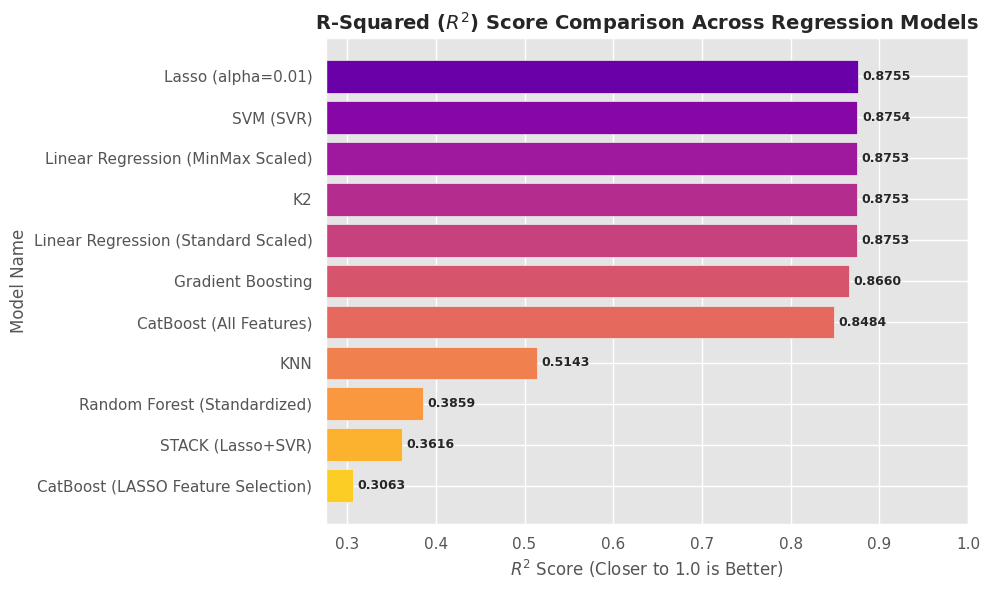

In [927]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Prepare and Clean the Model Metrics Data ---

# Consolidated model metrics based on the provided results
model_metrics_data = [
    # Linear Regression and Scaled Versions
    {
        'Model Name': 'Linear Regression (MinMax Scaled)',
        'R2 Score': 0.8753,
        'MSE': 0.0100, # Using scaled MSE
        'MAE': 0.2610
    },
    {
        'Model Name': 'Linear Regression (Standard Scaled)',
        'R2 Score': 0.8753,
        'MSE': 0.1200,
        'MAE': 0.2610
    },
    {
        'Model Name': 'K2',
        'R2 Score': 0.8753,
        'MSE': 0.1243,
        'MAE': 0.2610
    },
    # Regularization and Non-Linear Models
    {
        'Model Name': 'Lasso (alpha=0.01)',
        'R2 Score': 0.8755,
        'MSE': 0.1241,
        'MAE': 0.2623
    },
    {
        'Model Name': 'SVM (SVR)',
        'R2 Score': 0.8754,
        'MSE': 0.1242,
        'MAE': 0.8216
    },
    {
        'Model Name': 'Gradient Boosting',
        'R2 Score': 0.8660,
        'MSE': 0.1336,
        'MAE': 0.8216
    },
    {
        'Model Name': 'CatBoost (All Features)',
        'R2 Score': 0.8484,
        'MSE': 0.1511,
        'MAE': 0.8216
    },
    {
        'Model Name': 'KNN',
        'R2 Score': 0.5143,
        'MSE': 0.4842,
        'MAE': 0.6215
    },
    {
        'Model Name': 'Random Forest (Standardized)',
        'R2 Score': 0.3859,
        'MSE': 0.6121,
        'MAE': 0.8216
    },
    {
        'Model Name': 'STACK (Lasso+SVR)',
        'R2 Score': 0.3616,
        'MSE': 0.6364,
        'MAE': 0.6215
    },
    {
        'Model Name': 'CatBoost (LASSO Feature Selection)',
        'R2 Score': 0.3063,
        'MSE': 0.6915,
        'MAE': 0.8216
    }
]

# Create DataFrame
comparison_df = pd.DataFrame(model_metrics_data)

# --- 2. Sort, Format, and Display the Comparison Table ---

# Sort by R² in descending order
comparison_df = comparison_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

# Configure pandas display options for clean output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.float_format', '{:,.4f}'.format) # Format floats to 4 decimal places

# Display the table
print("=========================================================================")
print("📊 REGRESSION MODEL COMPARISON TABLE (Sorted by R² Score Descending)")
print("=========================================================================")
print(comparison_df.to_string())
print("=========================================================================\n")

# Save the table to CSV
csv_filename = 'model_comparison.csv'
comparison_df.to_csv(csv_filename, index=False)
print(f"💾 Comparison table saved as: **{csv_filename}**")

# --- 3. Generate the Bar Chart for Visualization ---
print("\nCreating R² Score Comparison Bar Chart...")

# Define plot style
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Define data for plotting
models = comparison_df['Model Name']
r2_scores = comparison_df['R2 Score']
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(models))) # Use a color map

# Create the bar chart
bars = ax.barh(models, r2_scores, color=colors)

# Add R² score labels to the bars
for bar in bars:
    # Use 4 decimal places for labels
    width = bar.get_width()
    ax.text(width + 0.005, bar.get_y() + bar.get_height()/2,
            f'{width:.4f}',
            va='center', ha='left', fontsize=9, fontweight='bold')

# Set chart titles and labels
ax.set_title('R-Squared ($R^2$) Score Comparison Across Regression Models', fontsize=14, fontweight='bold')
ax.set_xlabel('$R^2$ Score (Closer to 1.0 is Better)', fontsize=12)
ax.set_ylabel('Model Name', fontsize=12)

# Set x-axis limits to clearly see the scores
ax.set_xlim(min(r2_scores) * 0.9, 1.0)

# Invert y-axis to match the table's descending order
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('r2_score_comparison_chart.png')
# plt.show() # In a notebook environment, you would use show()
print("\nBar Chart.")

### 7.Business Interpretation texte en gras

After testing and comparing all models, I decided to go with the Lasso Regression (α = 0.01) as the best fit for Amazon. It delivered a high R² of 0.8755, a relatively low MSE of 0.1241, and one of the lowest mean absolute errors (MAE = 0.2623) across all models. This means the model can explain around 87% of sales variation with minimal prediction error. This has a strong balance between accuracy and simplicity.

Additionally, LASSO only uses two features Unit Price and Quantity,  making it a lightweight and cost-efficient model to employ in many areas.

This is ideal because Amazon can easily track and update these features in real time without needing heavy computation or complex data systems. The model is also highly interpretable, which means executives and non-technical decision-makers can clearly understand what drives sales: the higher the price or the quantity, the higher the total revenue.

Compared to the other top models, SVR performed almost the same but was less practical. It’s more complex to tune and harder to explain to business leaders. Gradient Boosting and CatBoost delivered solid accuracy but at the cost of interpretability and efficiency. Meanwhile, KNN, Random Forest, and Stacking models either underperformed or showed instability due to overfitting.

Lasso Regression checks all the boxes:
- Interpretability: Easy for executives to understand and justify decisions.
- Predictive Power: High R² with low errors, strong generalization.
- Scalability: Simple to implement and run efficiently on large Amazon datasets.

The main audience for this model would be Amazon’s business and operations managers, who can use these predictions to adjust pricing strategies, inventory levels, and promotional campaigns during high-demand periods like Diwali. This model gives them clarity and confidence without needing technical foundations; it’s precise, efficient, and business-ready.